In [1]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy_groupies as npg
import pandas as pd
import scipy.stats as stats
import scipy.special as ss
import sortedcontainers as sc
import os
import tqdm
import pickle

### Load libraries

In [2]:
from statsmodels.discrete.discrete_model import NegativeBinomial as statsNB

In [3]:
os.environ["CAPY_REF_FA"] = "/home/opriebe/data/ref/hg19/Homo_sapiens_assembly19.fasta"
import hapaseg.coverage_MCMC as mcmc_cov
import hapaseg.NB_coverage_MCMC as nb_cov
from capy import mut, seq

Cannot find path to gnomAD index; gnomAD functionality disabled.


In [4]:
import hapaseg.coverage_DP as dp_cov
import hapaseg.a_cov_DP as dp_a_cov

In [5]:
colors = mpl.cm.get_cmap("tab20").colors

In [6]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 30

In [7]:
multidraw_df = pd.read_pickle('exome_results/acdp_df.pickle')

In [8]:
mcmc_data = np.load('exome_results/coverage_mcmc_clusters/cov_mcmc_collected_data.npz')
beta = mcmc_data['beta']

In [9]:
allelic_segs = pd.read_pickle("exome/6_C1D1_META.allelic_segs.auto_ref_correct.overdispersion92.no_phase_correct.pickle")
chrbdy = allelic_segs.dropna().loc[:, ["start", "end"]]
chr_ends = chrbdy.loc[chrbdy["start"] != 0, "end"].cumsum()

In [10]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

alpha=50, beta = alpha/2 * 30

In [42]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [43]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([2087,  354,  354, ...,   -1,   -1,   -1])],
 SortedDict({31: 13537, 354: 38597, 441: 49299, 637: 43023, 839: 4416, 2087: 10484, 2137: 3, 3424: 508}))

In [44]:
len(a_cov_dp.cluster_dict)

8

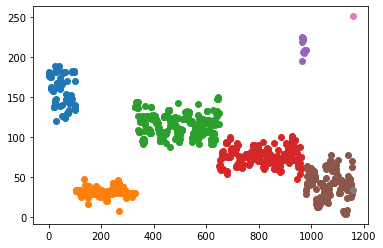

In [45]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

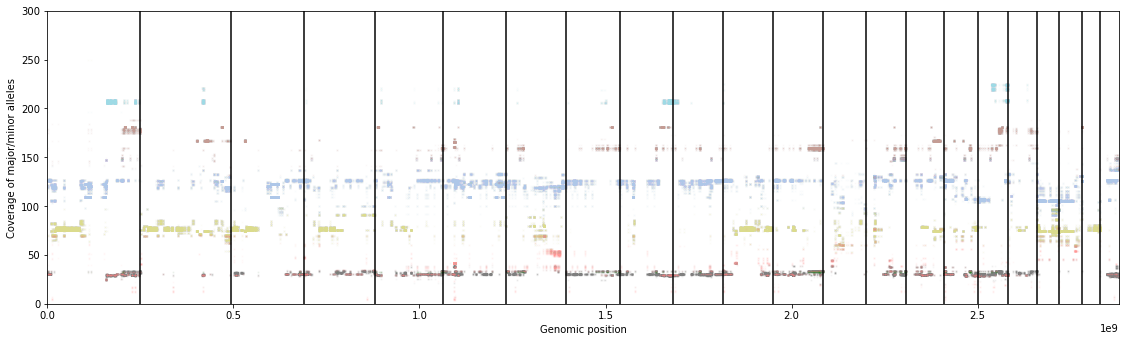

In [47]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

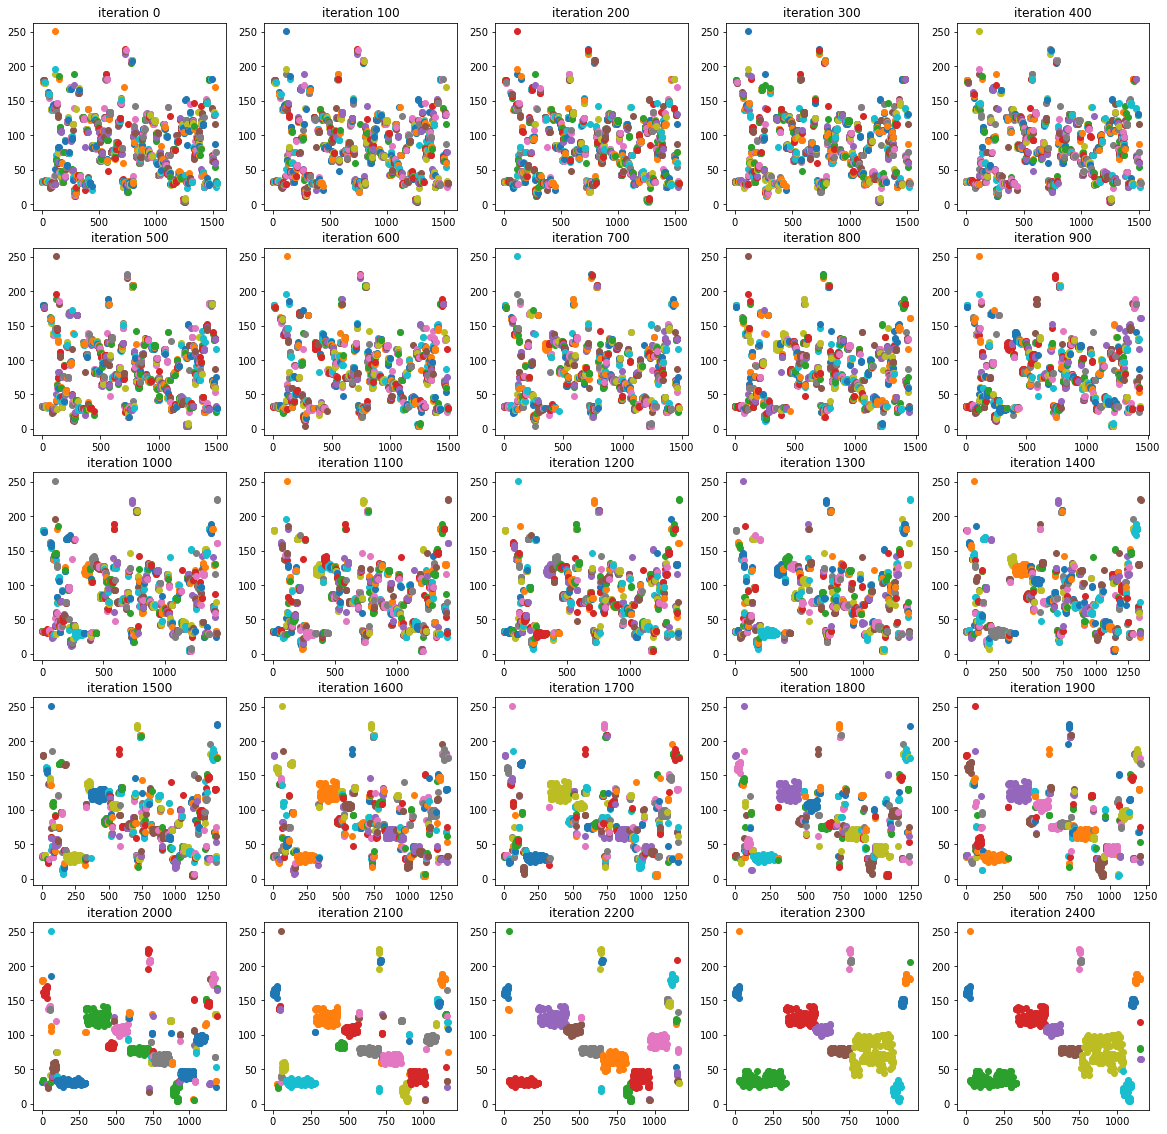

In [46]:
f, axs = plt.subplots(5,5,figsize=(20,20))
ax_lst = axs.flatten()
for i in range(25):
    counter=0
    for c in a_cov_dp.cdict_history[i]:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cdict_history[i][c]]
        ax_lst[i].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[i].set_title('iteration {}'.format(i*100))

alpha = 50, beta = alpha/2 * 20

In [56]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [57]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [58]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n

([array([432, 432, 432, ...,  -1,  -1,  -1])],
 SortedDict({366: 74439, 432: 46972, 642: 32940, 772: 1070, 838: 3547, 4912: 332, 6265: 18, 6280: 31, 6281: 61, 6282: 44}))

In [59]:
len(a_cov_dp.cluster_dict)

10

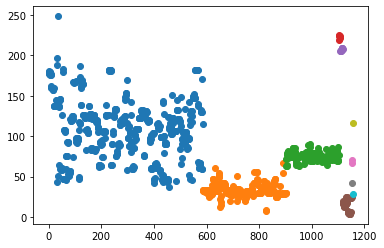

In [60]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

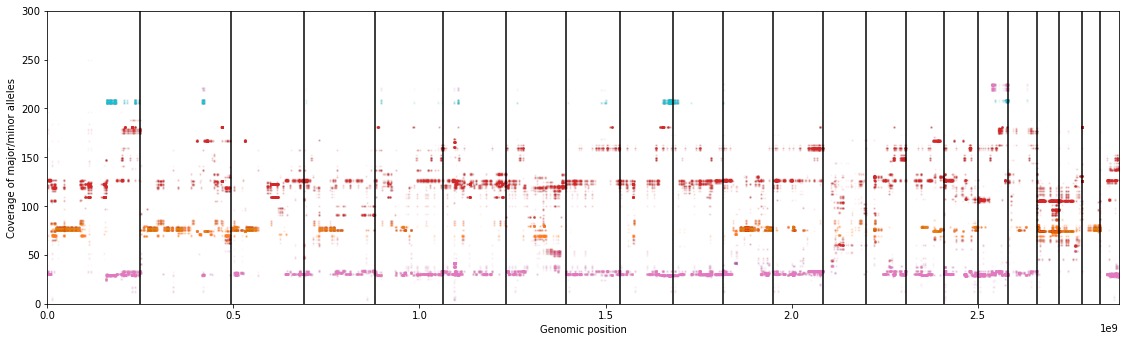

In [61]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [73]:
len(a_cov_dp.cdict_history)

165

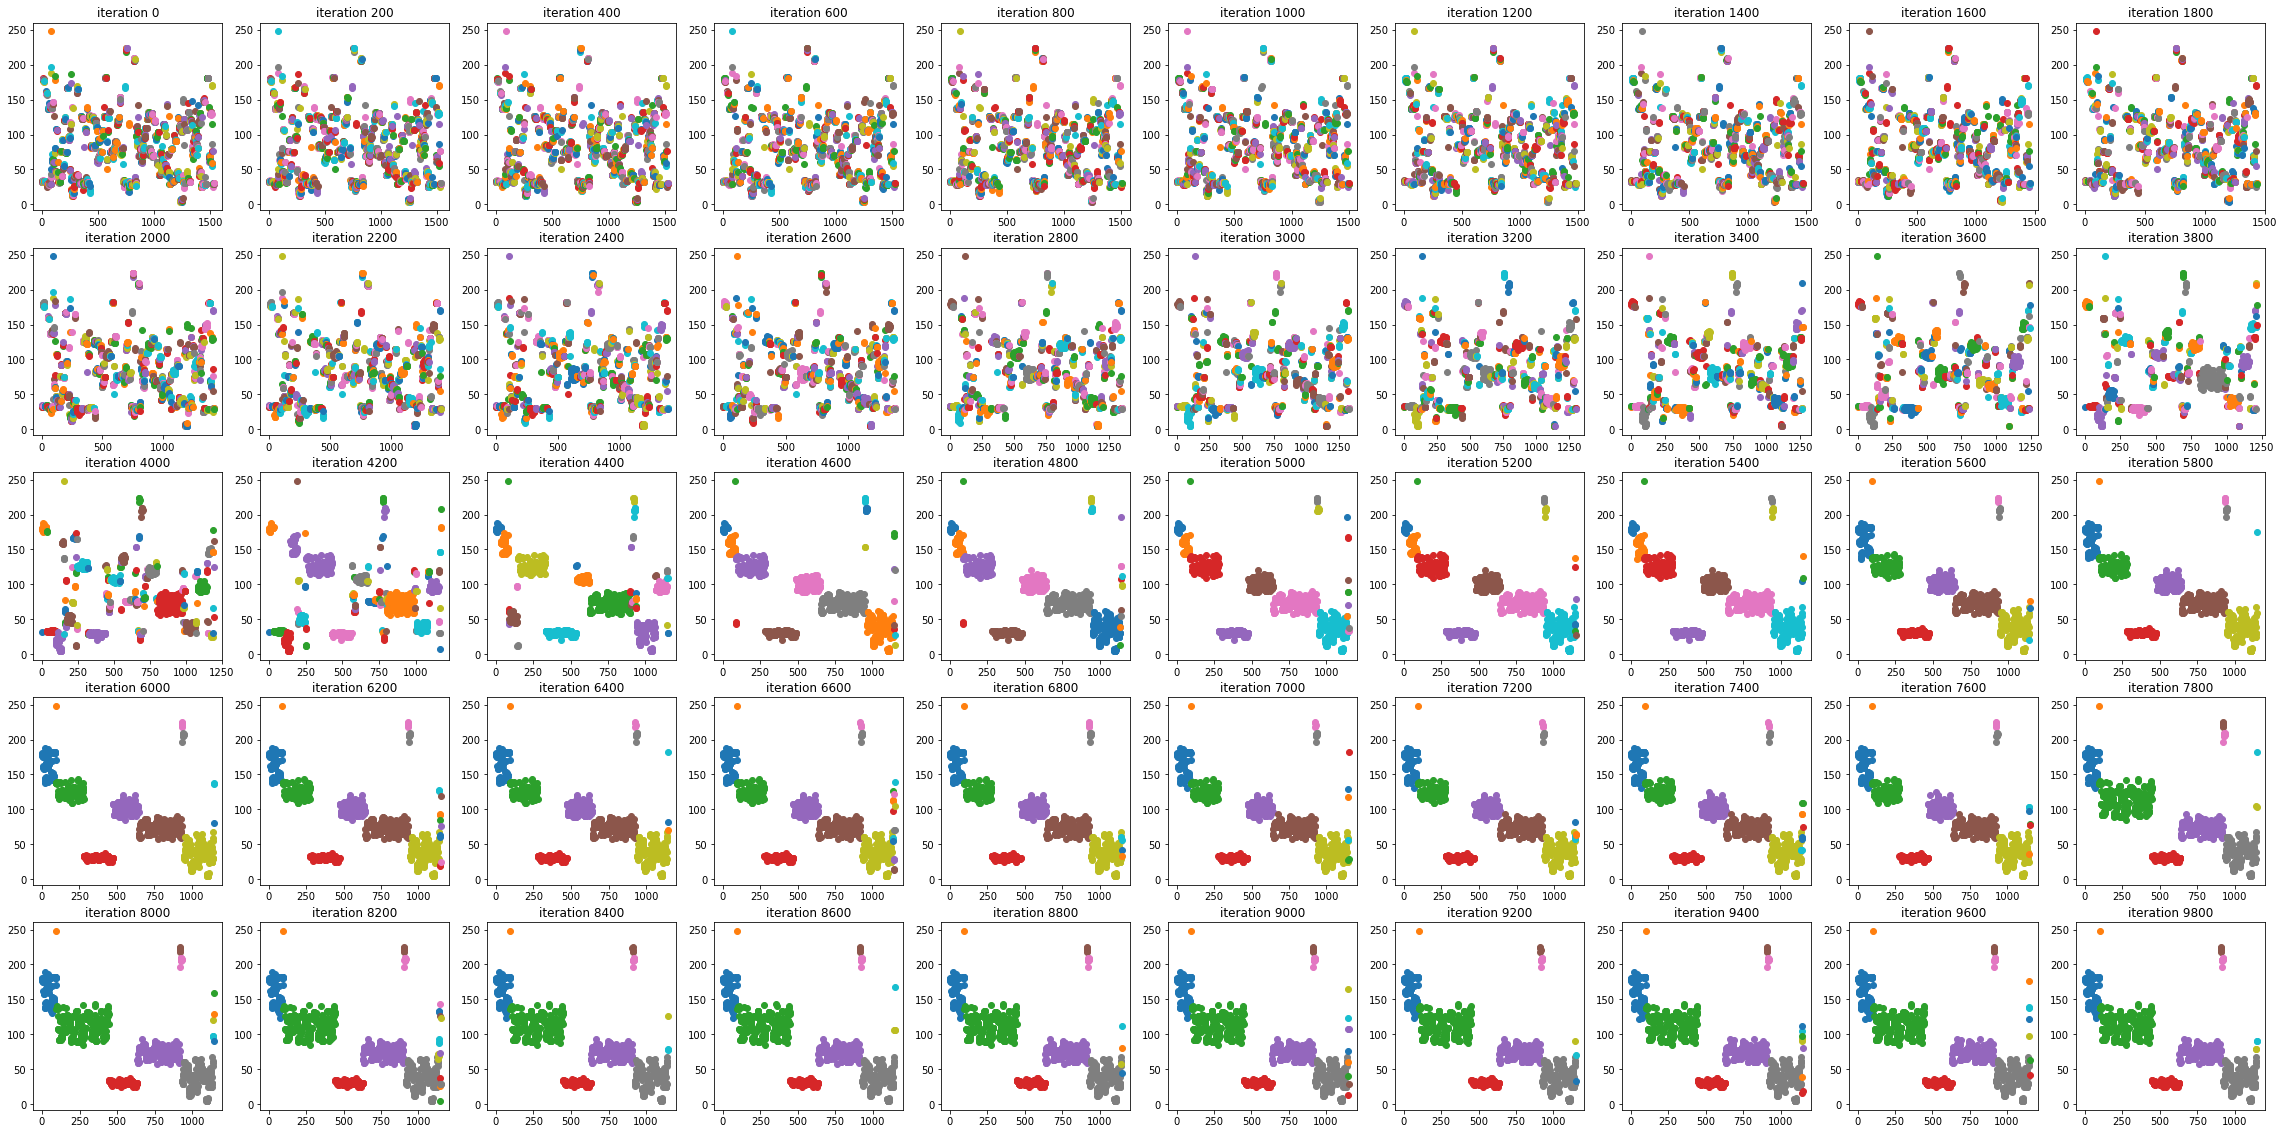

In [74]:
f, axs = plt.subplots(5,10,figsize=(40,20))
ax_lst = axs.flatten()
for i in range(50):
    counter=0
    for c in a_cov_dp.cdict_history[i]:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cdict_history[i][c]]
        ax_lst[i].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[i].set_title('iteration {}'.format(i*200))

alpha = 100, beta = alpha/2 * 30

In [145]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [146]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [147]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([354, 354, 354, ...,  -1,  -1,  -1])],
 SortedDict({354: 42392, 364: 110545, 771: 1021, 840: 3498, 3368: 44, 3369: 47, 3371: 239, 3372: 69, 3374: 1069}))

In [148]:
len(a_cov_dp.cluster_dict)

9

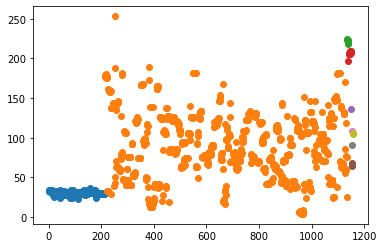

In [149]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

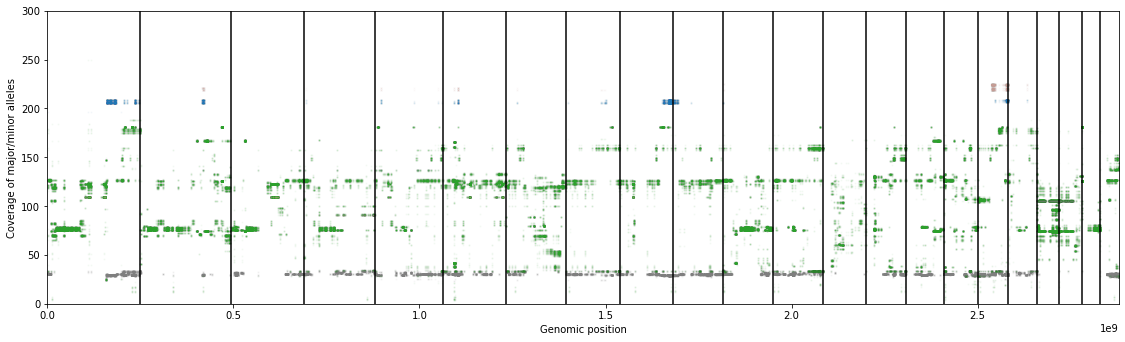

In [150]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [151]:
len(a_cov_dp.cdict_history)

84

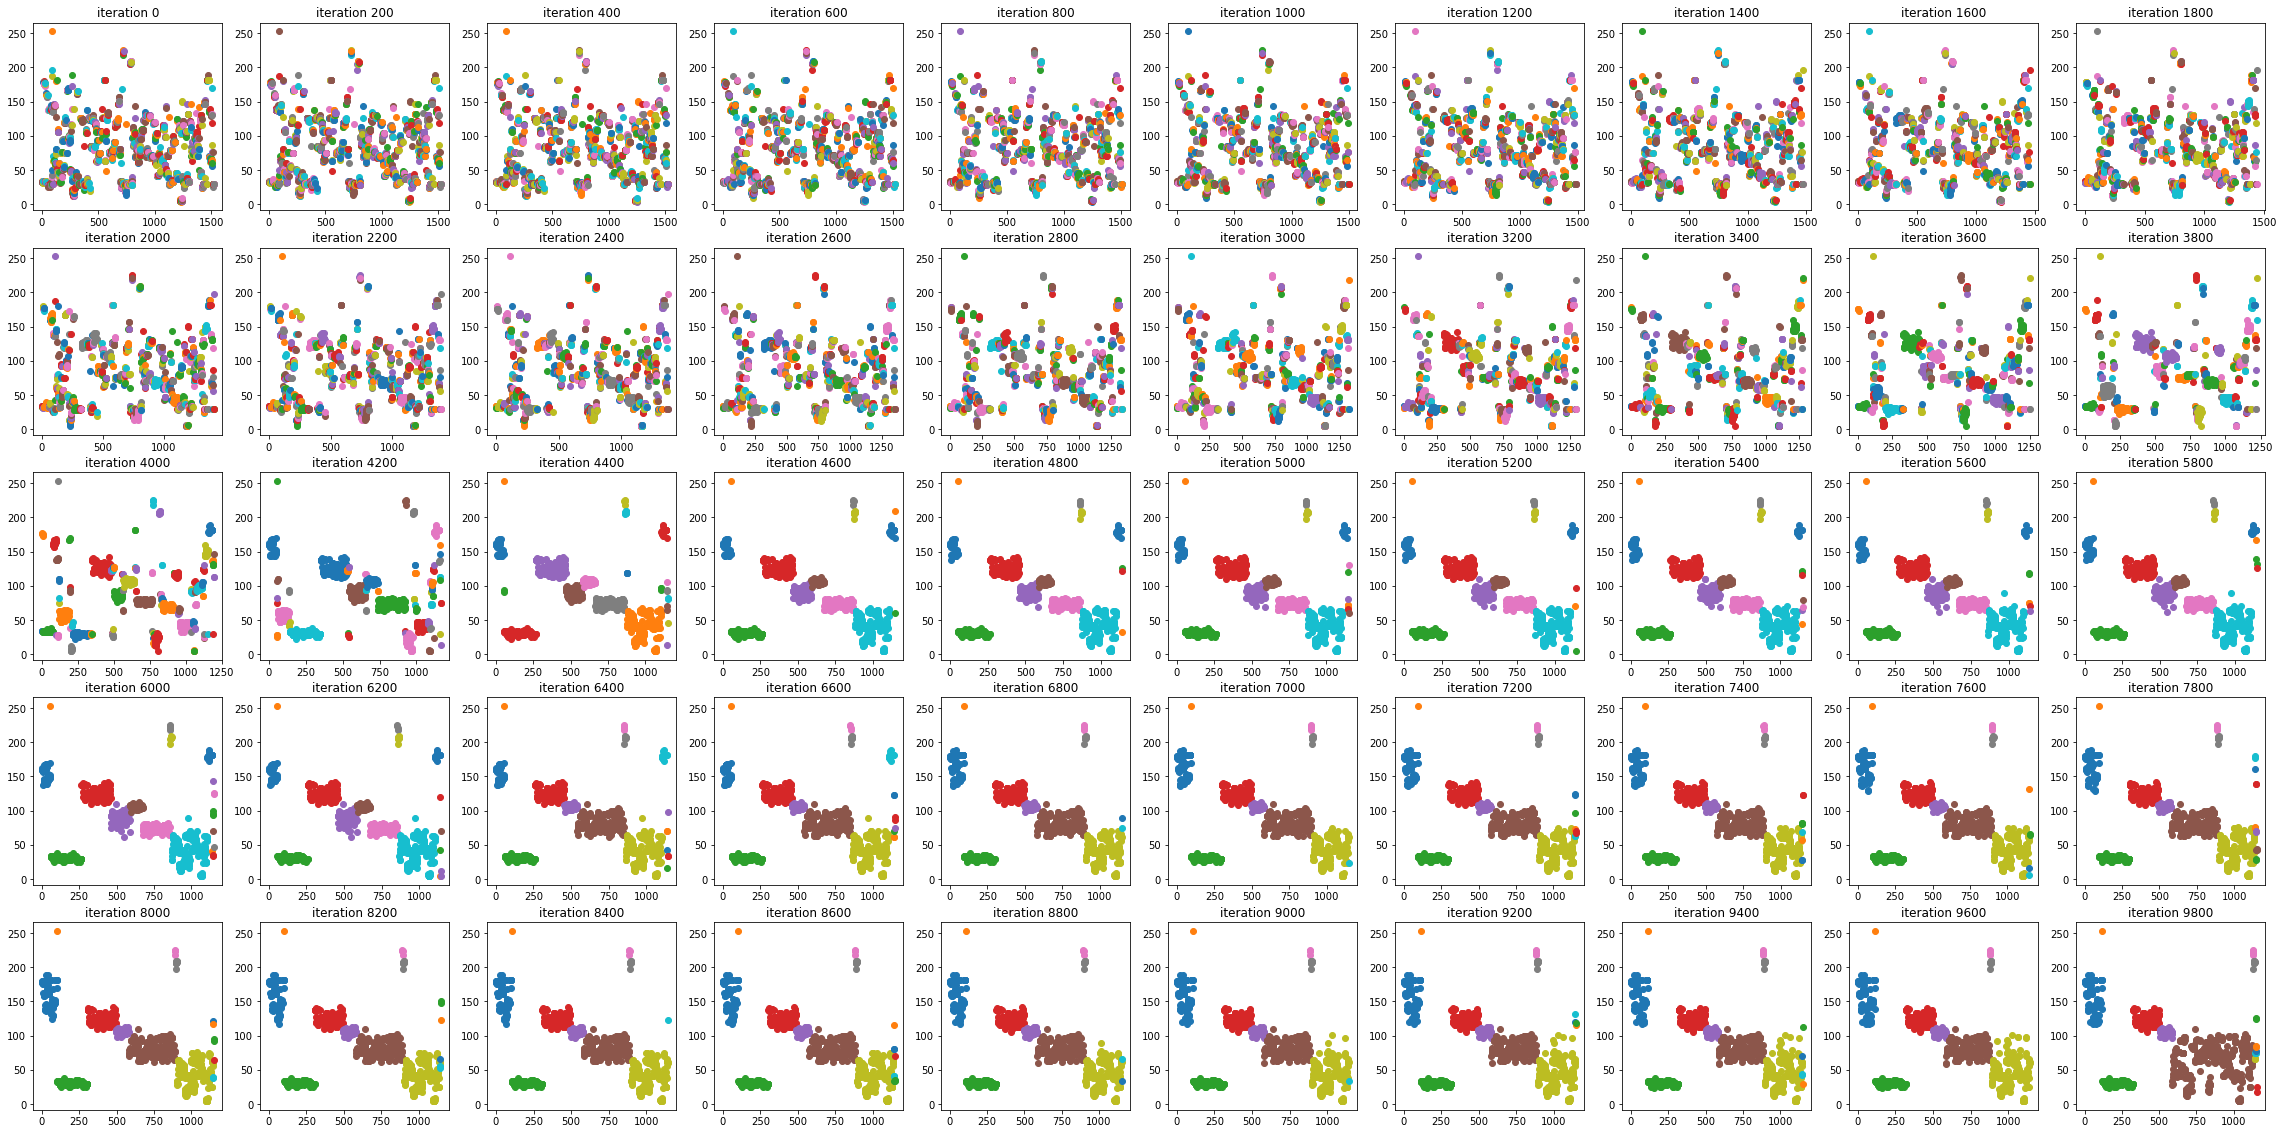

In [152]:
f, axs = plt.subplots(5,10,figsize=(40,20))
ax_lst = axs.flatten()
for i in range(50):
    counter=0
    for c in a_cov_dp.cdict_history[i]:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cdict_history[i][c]]
        ax_lst[i].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[i].set_title('iteration {}'.format(i*200))

In [153]:
list(a_cov_dp.cluster_dict.keys())

[354, 364, 771, 840, 3368, 3369, 3371, 3372, 3374]

In [156]:
a_cov_dp.cluster_dict[354]

SortedSet([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 21, 23, 24, 26, 27, 28, 29, 40, 41, 43, 44, 45, 56, 57, 58, 59, 60, 61, 62, 70, 80, 81, 82, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 267, 315, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 377, 379, 380, 381, 382, 383, 396, 398, 399, 400, 401, 402, 403, 404, 405, 417, 418, 419, 426, 427, 428, 429, 430, 431, 432, 433, 434, 445, 722, 723, 725, 730, 731, 733, 748, 749, 750, 751, 752, 753, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 780, 781, 782, 783, 784, 785, 786, 787, 801, 814, 815, 816, 817, 818, 819, 820, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 848, 849, 850, 852, 854, 862, 863, 868, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1202, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1241, 1287, 1288, 1289, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1332, 1333, 1335, 1336, 1337, 1338, 1339, 1340, 1448, 1450, 1451, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1484, 1485, 1

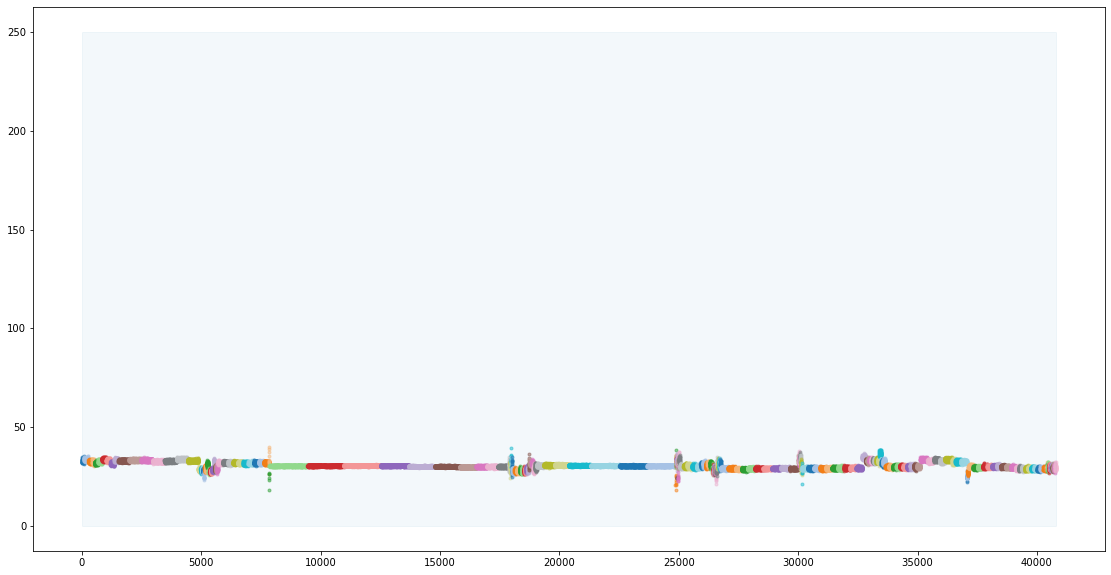

In [161]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [354]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for i, arr in enumerate(vals):
        ax.scatter(np.r_[counter:counter+len(arr)], arr, color = colors[(cc + i) % len(colors)], marker = '.', alpha=0.5)
        counter+= len(arr)
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.05, color = colors[cc % len(colors)]))
    cc+=1

switching to log space

In [103]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [104]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [105]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
burnin
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


([array([359, 359, 359, ..., 372, 372, 372])],
 SortedDict({359: 59676, 372: 133943, 2367: 22, 2426: 7, 2577: 59, 2715: 530, 2716: 209, 2718: 196}))

In [106]:
len(a_cov_dp.cluster_dict)

8

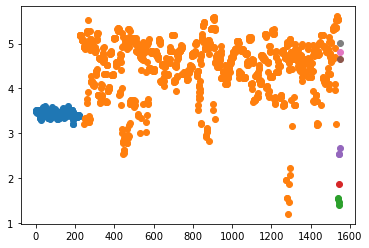

In [107]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

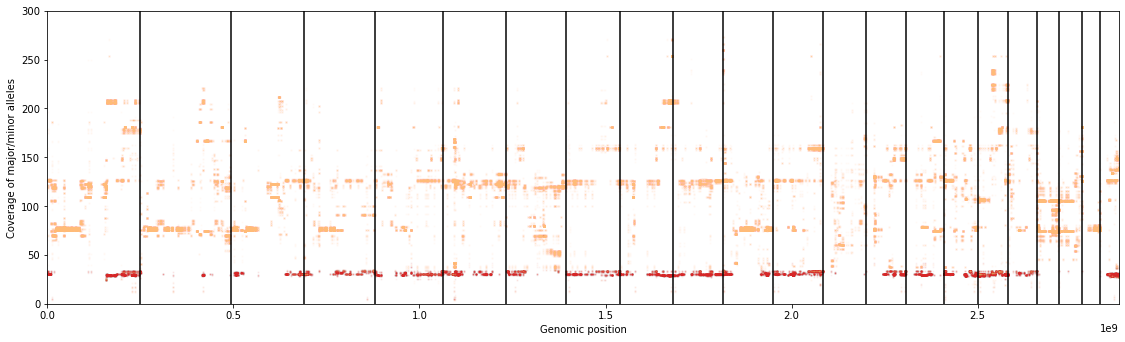

In [95]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [108]:
len(a_cov_dp.cdict_history)

66

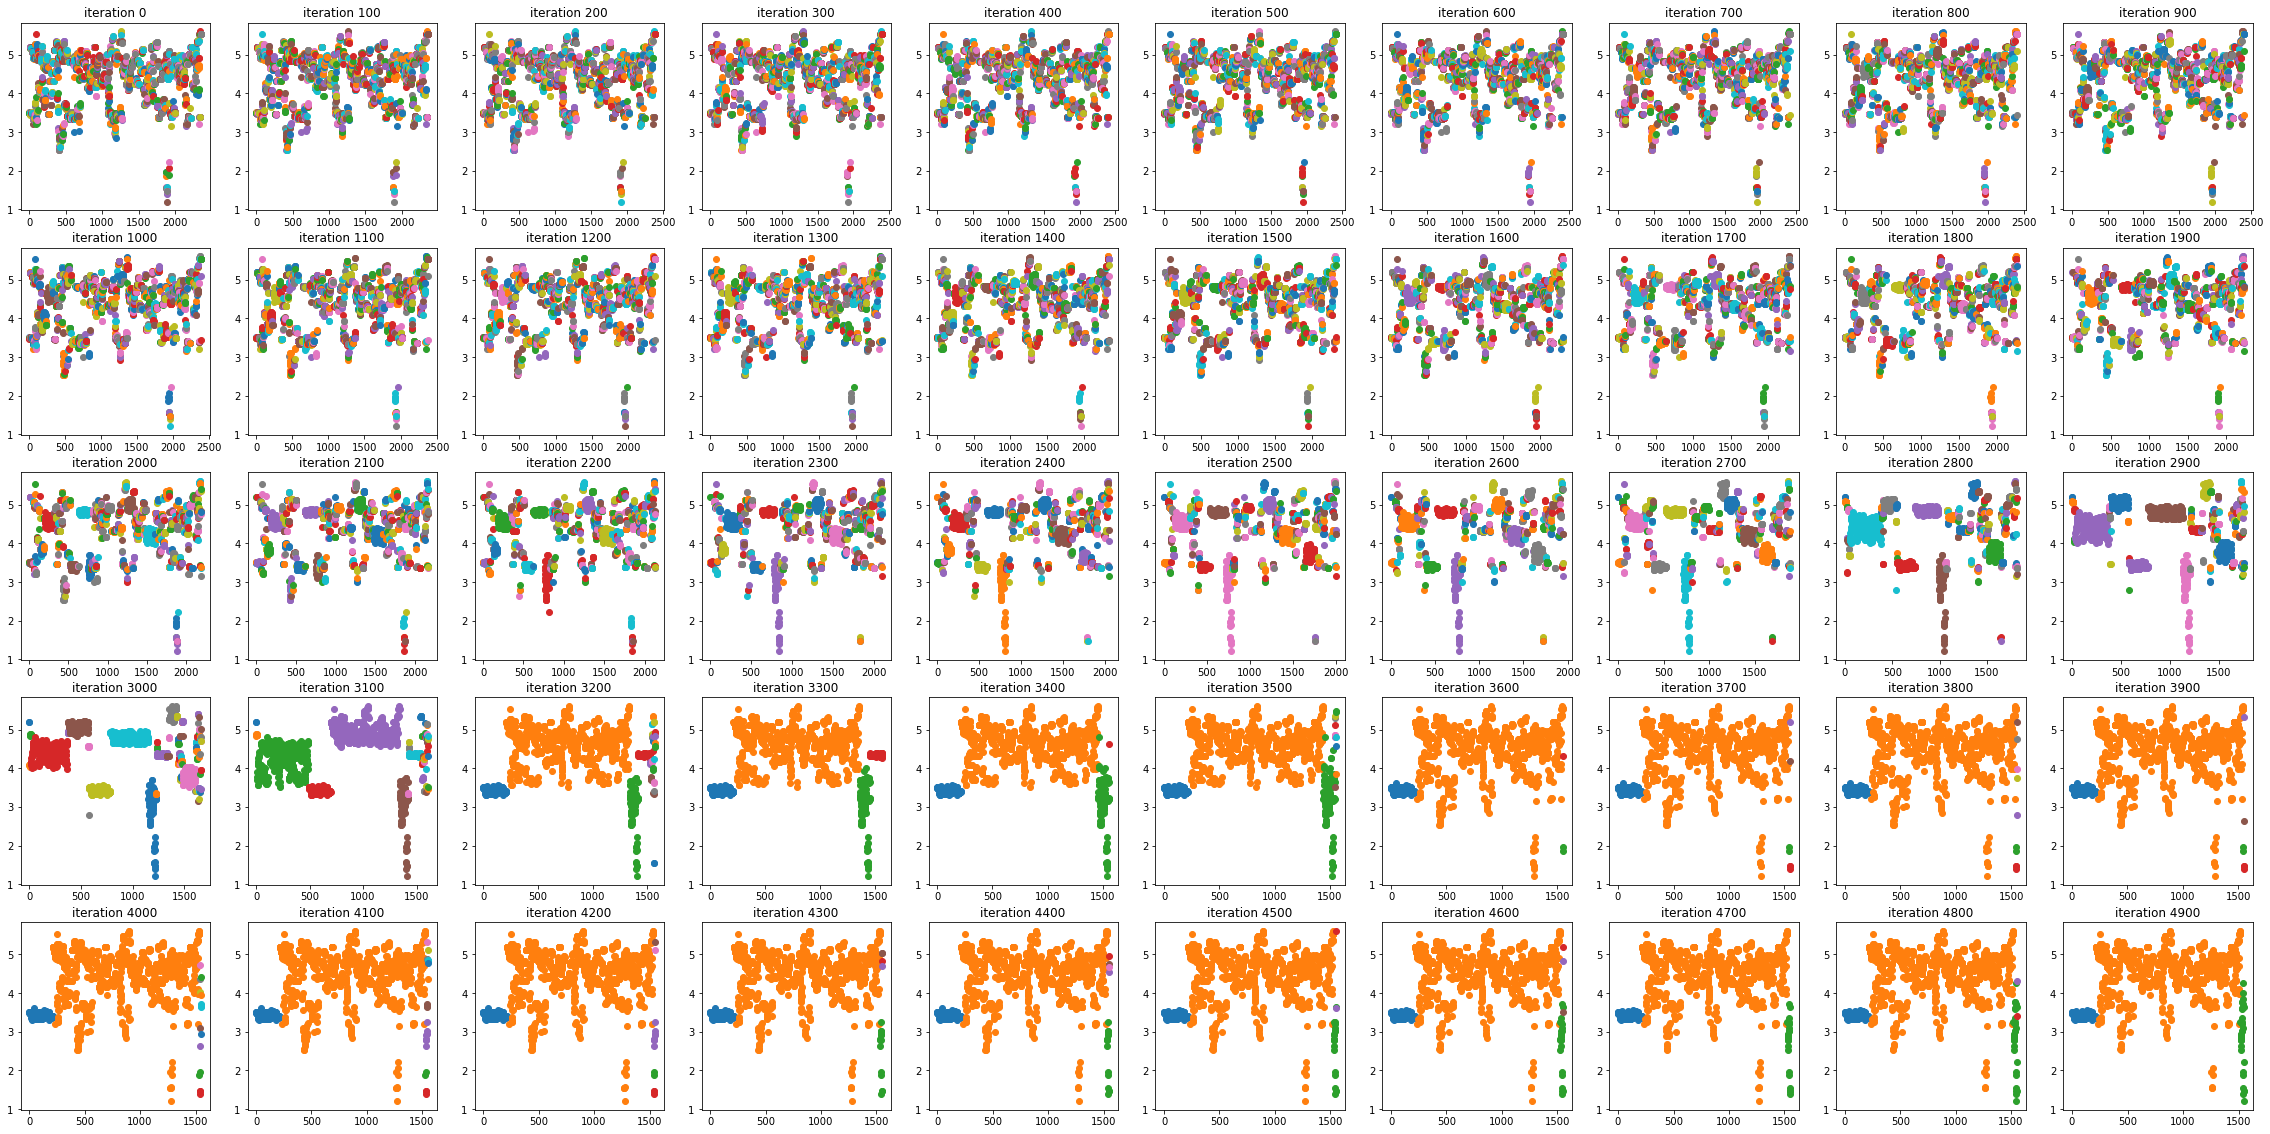

In [109]:
f, axs = plt.subplots(5,10,figsize=(40,20))
ax_lst = axs.flatten()
for i in range(50):
    counter=0
    for c in a_cov_dp.cdict_history[i]:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cdict_history[i][c]]
        ax_lst[i].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[i].set_title('iteration {}'.format(i*100))

In [20]:
a_cov_dp.cov_df

chr     start       end  covcorr   covraw     start_g       end_g  \
0       1    984246    984439    72279   110383      984246      984439   
1       1   1138970   1139348   185857   281995     1138970     1139348   
2       1   1147321   1147518    78285   120449     1147321     1147518   
3       1   1469305   1469452    36846    57636     1469305     1469452   
4       1   1956956   1957177    69400   108383     1956956     1957177   
...    ..       ...       ...      ...      ...         ...         ...   
16295  22  50986595  50988380   977681  1456772  2880715315  2880717100   
16296  22  51009803  51009968    59148    93244  2880738523  2880738688   
16297  22  51042269  51043492   635932   981591  2880770989  2880772212   
16298  22  51064006  51064109    40385    64456  2880792726  2880792829   
16299  22  51065593  51065834   104486   159295  2880794313  2880794554   

       C_len      C_RT    C_RT_z      C_GC    C_GC_z  allelic_cluster  \
0        194  1.079453  1.880682  0.685567  0.269813                3   
1        379  0.909914  0.588950  0.704485  0.291114                0   
2        198  0.909914  0.588950  0.707071  0.293980                3   
3        148  0.870065  0.250387  0.668919  0.250576                8   
4        222  1.002400  1.320789  0.621622  0.193192                3   
...      ...       ...       ...       ...       ...              ...   
16295   1786  0.954171  0.948001  0.693729  0.279074                0   
16296    166  1.022385  1.470038  0.602410  0.168626                0   
16297   1224  1.060847  1.749233  0.744281  0.334114                0   
16298    104  1.060847  1.749233  0.576923  0.134799                0   
16299    242  1.060847  1.749233  0.702479  0.288882                0   

       segment_ID   min_count   maj_count  cov_DP_cluster  cov_DP_mu  \
0              32   69.952971  290.720000               3   5.052250   
1               0   85.692389  406.640000               0   5.359086   
2              32   84.817977  323.840000               3   5.052250   
3              87   59.460025   97.520000               7   5.195118   
4              32   72.576207  241.040000               3   5.052250   
...           ...         ...         ...             ...        ...   
16295          10  156.400000  703.901770               7   5.130953   
16296          10   36.800000  182.752136               7   5.130953   
16297          10   71.760000  388.238988               7   5.130953   
16298          10   76.948268  247.480000               7   5.130953   
16299          10    0.000000    0.000000               7   5.130953   

       cov_DP_sigma      next_g  allele  dp_draw  
0          0.000025     1138970      -1        0  
1          0.000464     1147321      -1        0  
2          0.000025     1469305      -1        0  
3          0.000458     1956956      -1        0  
4          0.000025     1959593      -1        0  
...             ...         ...     ...      ...  
16295      0.000345  2880738523       1        9  
16296      0.000345  2880770989       1        9  
16297      0.000345  2880792726       1        9  
16298      0.000345  2880794313       1        9  
16299      0.000345  2880794554       1        9  

[163000 rows x 22 columns]

In [36]:
np.exp(stats.norm.rvs(5.359086, np.sqrt(0.000464), 1000)).var()

20.096081272711242

In [37]:
res = []
for m, s in zip(a_cov_dp.cov_df.cov_DP_mu, a_cov_dp.cov_df.cov_DP_sigma):
    res.append(np.exp(stats.norm.rvs(m, np.sqrt(s), 1000)).var())

In [40]:
np.array(res).mean()

17.566201635446006

In [41]:
np.median(res)

4.279760039207116

In [37]:
res = []
for m, s in zip(a_cov_dp.cov_df.cov_DP_mu, a_cov_dp.cov_df.cov_DP_sigma):
    res.append(stats.norm.rvs(m, np.sqrt(s), 1000) + ).var())

In [71]:
a_cov_dp.cov_df.cov_DP_sigma.mean()

0.00047940200680433355

In [66]:
a_cov_dp.cov_df.cov_DP_sigma.median()

0.00014206350130084719

In [100]:
np.array(a_cov_dp.segment_V_list).mean()

0.003825146721194492

In [102]:
np.median(np.array(a_cov_dp.segment_V_list))

0.0009128725421440368

trying out splitting option (fingers crossed)

alpha = 50, beta = alpha /2 * 30

In [258]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [259]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [260]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 33
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 431
n unassigned: 0
n unassigned: 0
splitting cluster 442
n unassigned: 0
splitting cluster 645
n unassigned: 0
splitting cluster 24
n unassigned: 0
splitting cluster 354
splitting cluster 17
splitting cluster 847
n unassigned: 0
splitting cluster 1629
splitting cluster 1651
splitting cluster 1657
n unassigned: 0
splitting cluster 1678
splitting cluster 1716
n unassigned: 0
splitting cluster 1721
splitting cluster 1748
splitting cluster 1586
splitting cluster 1760
splitting cluster 33
n unassigned: 0
splitting cluster 1772
splitting cluster 1754
n unassigned: 0
splitting cluster 1773
splitting cluster 1826
n unassigned: 0
splitting cluster 1871
splitting cluster 1886
splitting cluster 1773
n unassigned: 0
splitting cluster 1913
splitting cluster 1788
n unassigned: 0
splittin

([array([2273, 2273, 2273, ...,   -1,   -1,   -1])],
 SortedDict({17: 3524, 24: 70, 79: 6, 442: 34317, 568: 12709, 772: 1070, 1020: 16218, 2148: 2310, 2240: 6779, 2273: 43945, 2291: 29766, 2351: 4, 2364: 57, 2365: 778, 2387: 139, 2388: 21, 2389: 56, 2390: 3240, 2391: 112, 2392: 79, 2394: 29, 2395: 27, 2396: 14, 2397: 101, 2398: 582, 2399: 182, 2400: 210}))

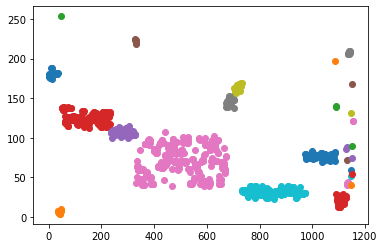

In [261]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

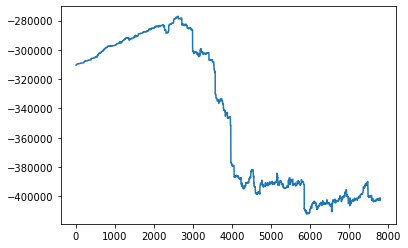

In [262]:
plt.plot(np.r_[:len(a_cov_dp.ML_total_history)], a_cov_dp.ML_total_history)

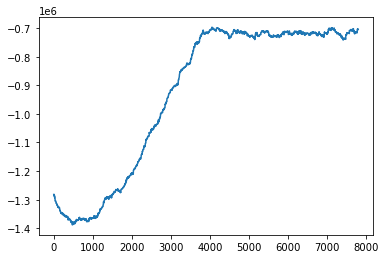

In [263]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))

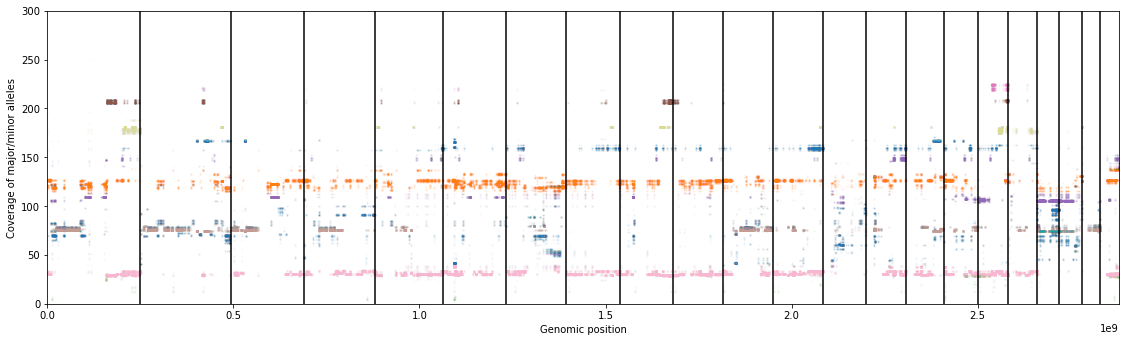

In [264]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [265]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

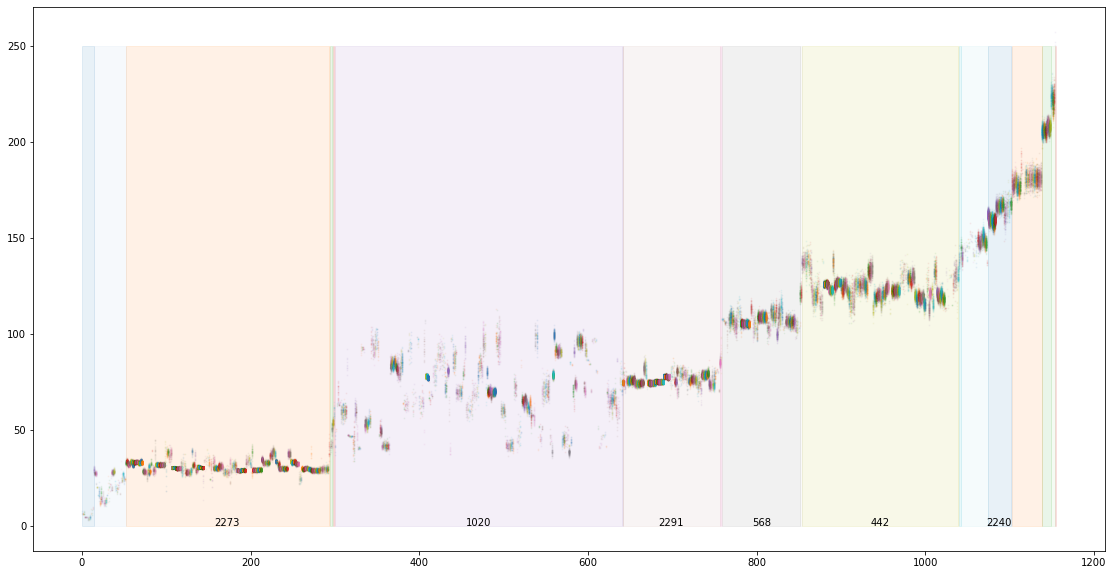

In [266]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 5000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

alpha = 100, beta = alpha /2 * 30

In [272]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [273]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [274]:
a_cov_dp.run(1)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 639
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 1018
n unassigned: 0
n unassigned: 0
splitting cluster 646
n unassigned: 0
splitting cluster 1488
splitting cluster 354
splitting cluster 1393
n unassigned: 0
splitting cluster 11
n unassigned: 0
splitting cluster 22
n unassigned: 0
splitting cluster 847
splitting cluster 1488
splitting cluster 11
splitting cluster 11
n unassigned: 0
splitting cluster 1583
splitting cluster 1609
splitting cluster 1591
splitting cluster 33
splitting cluster 11
splitting cluster 1610
n unassigned: 0
splitting cluster 1642
splitting cluster 1684
n unassigned: 0
splitting cluster 11
splitting cluster 1700
splitting cluster 1722
splitting cluster 1757
n unassigned: 0
splitting cluster 11
splitting cluster 1766
splitting cluster 1761
splitting cluster 11
n unassigned: 0
splitting cluster 1804
splitting cluster 1

([array([2283, 2412, 2283, ...,   -1,   -1,   -1])],
 SortedDict({11: 3515, 79: 6, 200: 4848, 364: 35108, 569: 11336, 772: 1070, 1393: 4743, 1668: 8920, 1985: 36653, 2264: 3674, 2283: 41603, 2353: 70, 2363: 3244, 2378: 75, 2389: 207, 2392: 900, 2400: 279, 2403: 46, 2405: 492, 2406: 8, 2410: 141, 2411: 88, 2412: 185}))

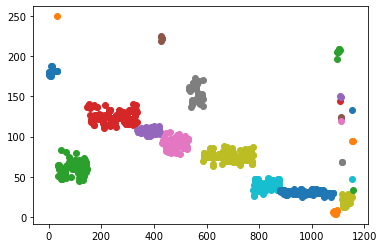

In [275]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

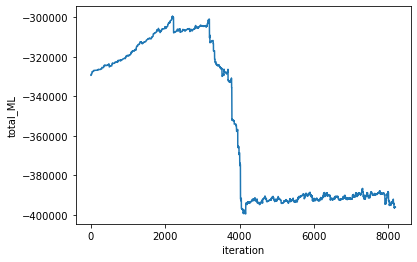

In [283]:
plt.plot(np.r_[:len(a_cov_dp.ML_total_history)], a_cov_dp.ML_total_history)
plt.ylabel('total_ML')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

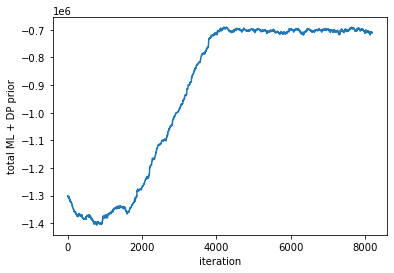

In [284]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

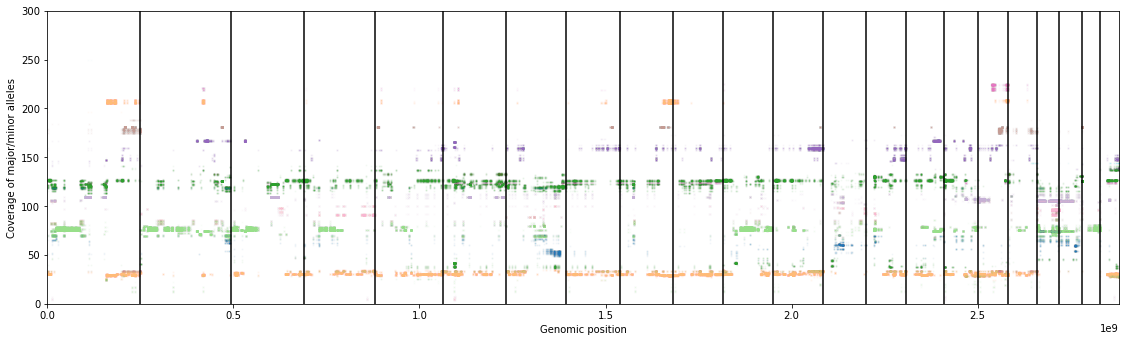

In [278]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [280]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

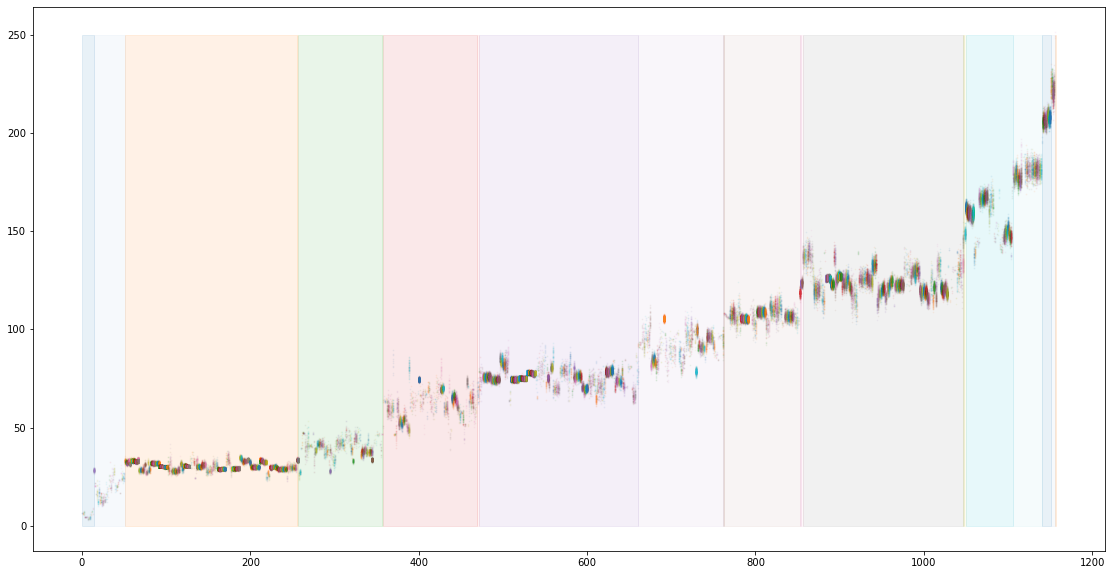

In [285]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    # if a_cov_dp.cluster_counts[c]> 5000:
    #     ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

checking with cold start

In [299]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [292]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=False)

In [293]:
a_cov_dp.run(1)

n unassigned: 1155
splitting cluster 6
splitting cluster 19
splitting cluster 15
splitting cluster 21
splitting cluster 20
splitting cluster 20
n unassigned: 1047
splitting cluster 30
splitting cluster 3
n unassigned: 934
splitting cluster 3
splitting cluster 37
splitting cluster 125
n unassigned: 843
splitting cluster 86
splitting cluster 176
n unassigned: 768
n unassigned: 679
splitting cluster 116
n unassigned: 608
n unassigned: 541
splitting cluster 120
n unassigned: 482
splitting cluster 185
splitting cluster 383
splitting cluster 101
n unassigned: 428
splitting cluster 40
n unassigned: 375
splitting cluster 427
splitting cluster 397
splitting cluster 473
splitting cluster 62
n unassigned: 333
splitting cluster 515
splitting cluster 521
splitting cluster 531
splitting cluster 509
n unassigned: 286
splitting cluster 548
splitting cluster 551


/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py:620: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp(ML_tot):


splitting cluster 578
splitting cluster 585
splitting cluster 602
splitting cluster 579
splitting cluster 141
n unassigned: 258
splitting cluster 604
n unassigned: 226
splitting cluster 660
splitting cluster 482
splitting cluster 68
splitting cluster 693
splitting cluster 674
n unassigned: 193
splitting cluster 383
splitting cluster 714
splitting cluster 741
n unassigned: 178
splitting cluster 709
splitting cluster 751
splitting cluster 685
splitting cluster 791
n unassigned: 132
splitting cluster 784
splitting cluster 796
n unassigned: 67
splitting cluster 812
n unassigned: 0
splitting cluster 837
splitting cluster 873
n unassigned: 0
splitting cluster 920
n unassigned: 0
splitting cluster 994
splitting cluster 1027
n unassigned: 0
splitting cluster 1041
splitting cluster 603
splitting cluster 685
splitting cluster 1076
n unassigned: 0
splitting cluster 685
splitting cluster 1099
splitting cluster 1119
splitting cluster 578
n unassigned: 0
splitting cluster 1131
splitting cluster 1167

([array([1406, 1431, 1431, ...,   -1,   -1,   -1])],
 SortedDict({5: 48943, 24: 3165, 72: 3, 233: 865, 753: 7710, 1369: 39320, 1406: 38820, 1431: 9146, 1496: 35, 1500: 292, 1514: 10, 1517: 149, 1518: 686, 1519: 137, 1520: 166, 1523: 86, 1525: 294, 1526: 3244, 1527: 128, 1531: 1178, 1533: 252, 1535: 530, 1536: 84, 1537: 10}))

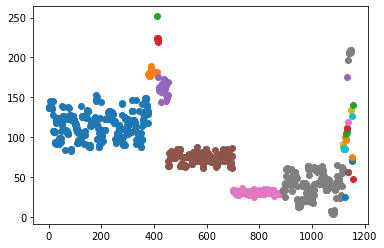

In [294]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

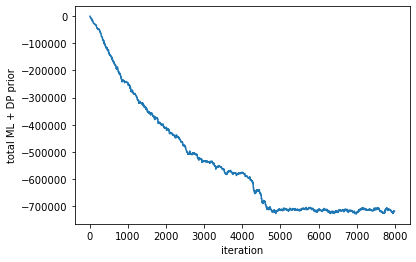

In [296]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

multiple runs with warm start to check stability alpha = 50

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 562
n unassigned: 0
splitting cluster 200
splitting cluster 359
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 355
splitting cluster 23
n unassigned: 0
splitting cluster 831
n unassigned: 0
splitting cluster 569
n unassigned: 0
splitting cluster 33
splitting cluster 831
splitting cluster 1499
splitting cluster 6
n unassigned: 0
splitting cluster 1499
n unassigned: 0
splitting cluster 1499
splitting cluster 1499
splitting cluster 1499
splitting cluster 33
n unassigned: 0
splitting cluster 1602
splitting cluster 637
splitting cluster 831
n unassigned: 0
splitting cluster 843
splitting cluster 1825
splitting cluster 370
n unassigned: 0
splitting cluster 470
splitting cluster 1499
splitting cluster 370
n unassigned: 0
splitting cluster 1499
splitting cluster 1834
splitting cluster 1590
n unassign

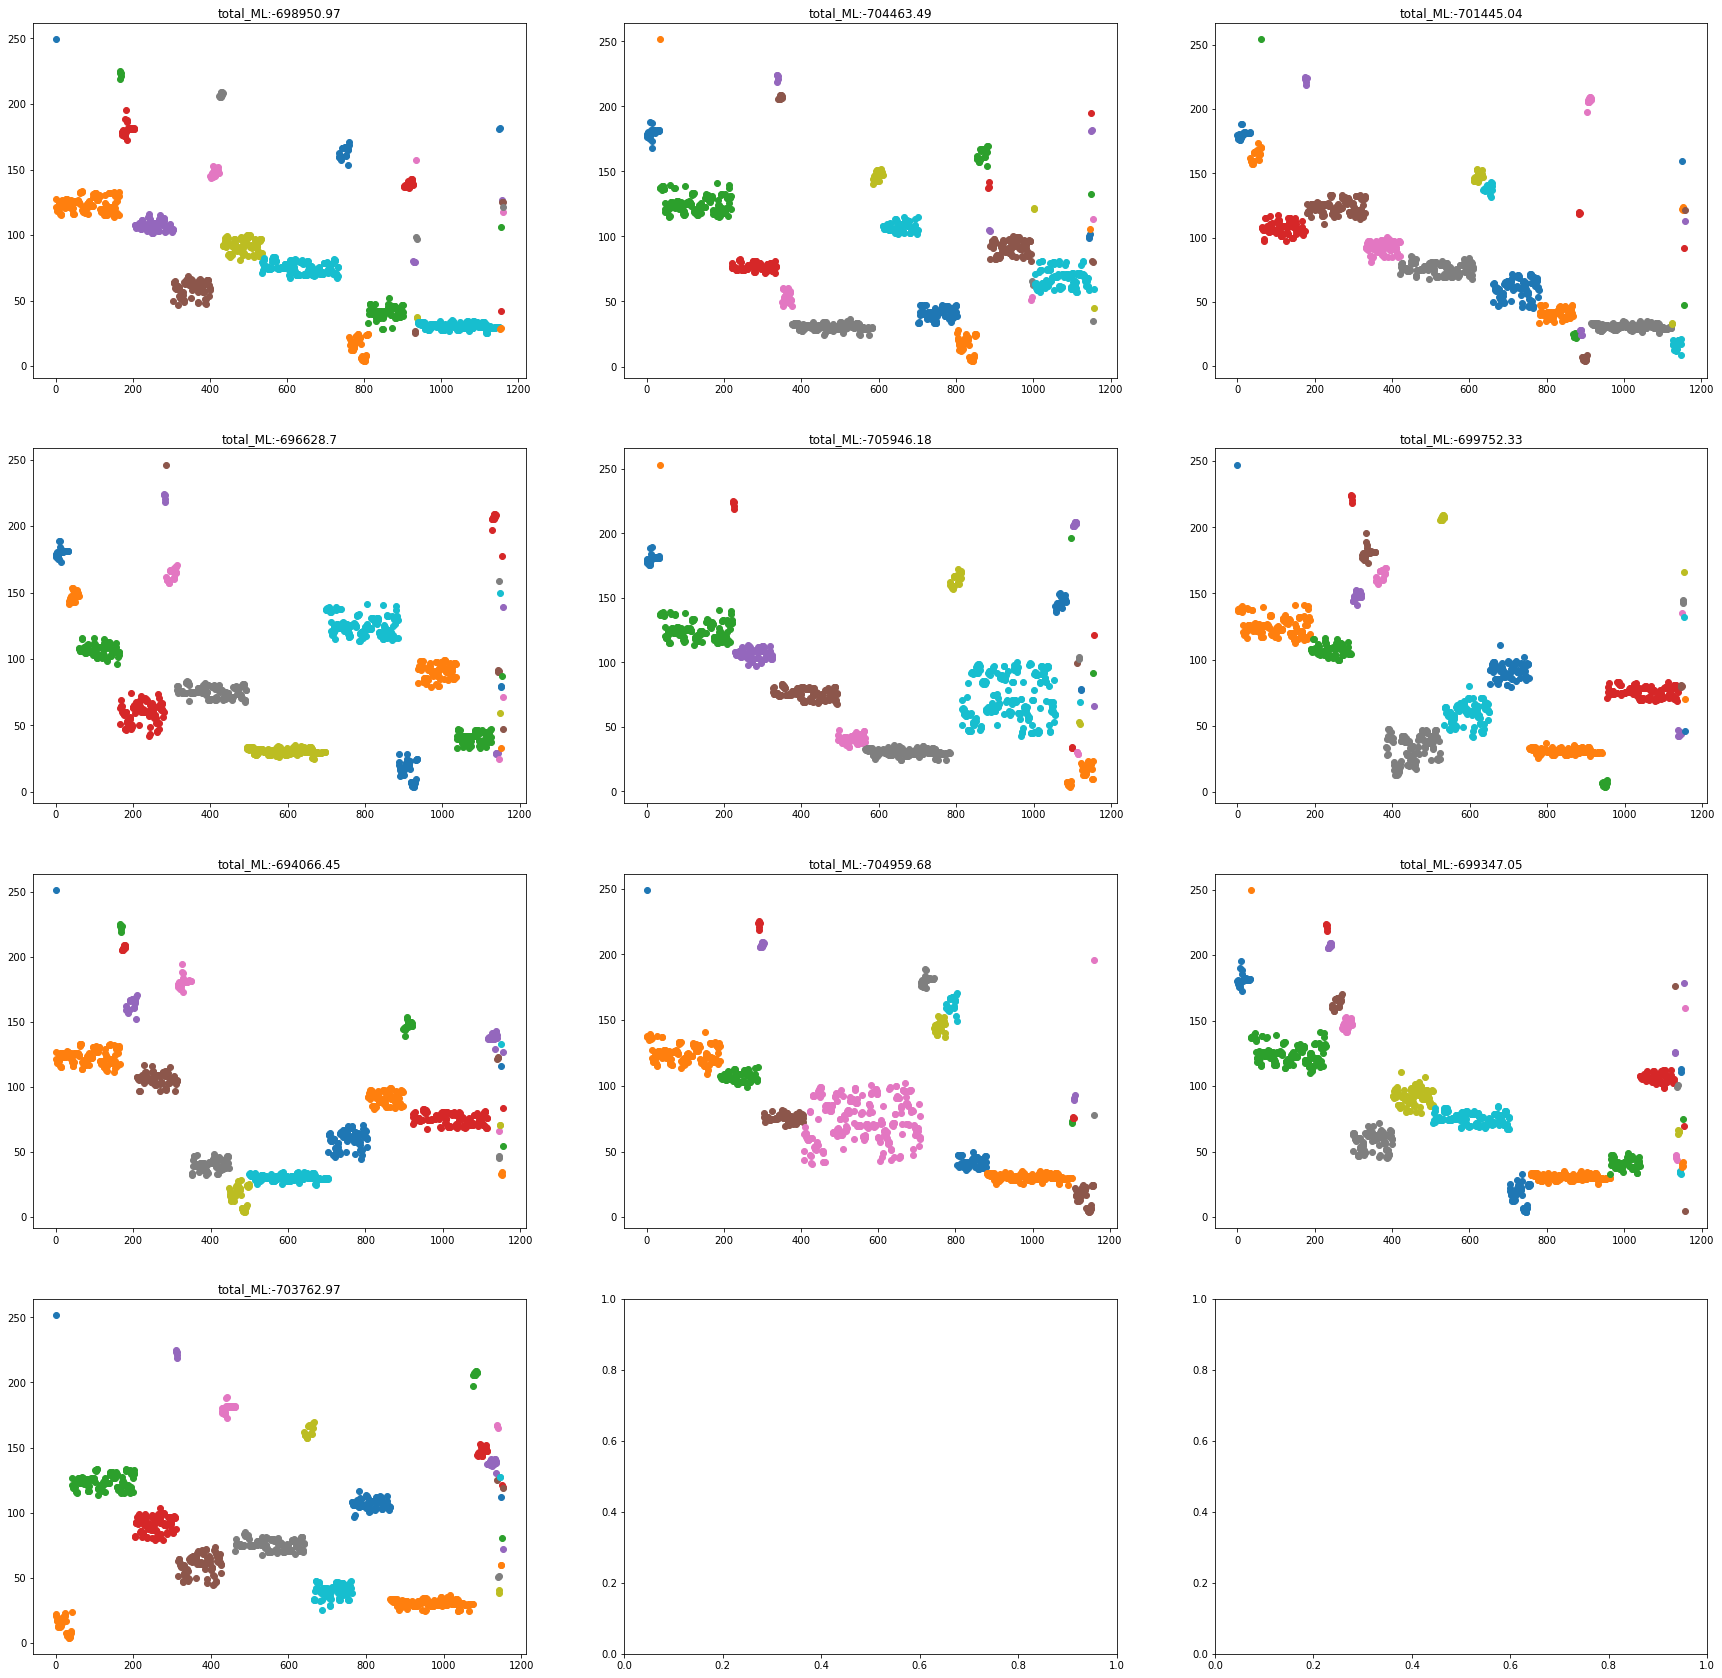

In [451]:
#no coverage prior
f_clust, axs = plt.subplots(4,3, figsize = (30,30))
ax_lst_clust = axs.flatten()
best_a_cov_dp = None
MLs = []
best_total_ML = -1e30
for run in range(10):
    a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)
    a_cov_dp.run(1)
    counter=0
    for c in a_cov_dp.cluster_dict:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
        ax_lst_clust[run].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    total_ML = a_cov_dp.DP_total_history[-1] + a_cov_dp.ML_total_history[-1]
    MLs.append(total_ML)
    if total_ML > best_total_ML:
        best_total_ML = total_ML
        best_a_cov_dp = a_cov_dp
    ax_lst_clust[run].set_title('total_ML:{}'.format(np.around(total_ML,2)))

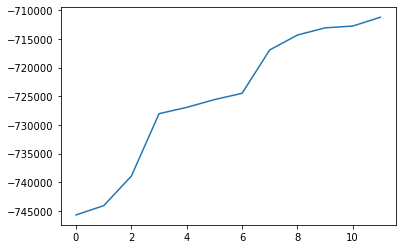

In [306]:
plt.plot(np.unique(np.array(MLs)))

In [307]:
a_cov_dp

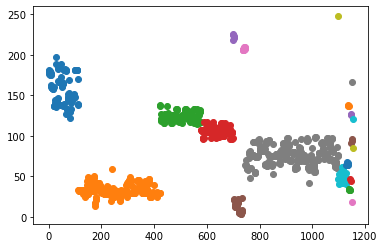

In [311]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

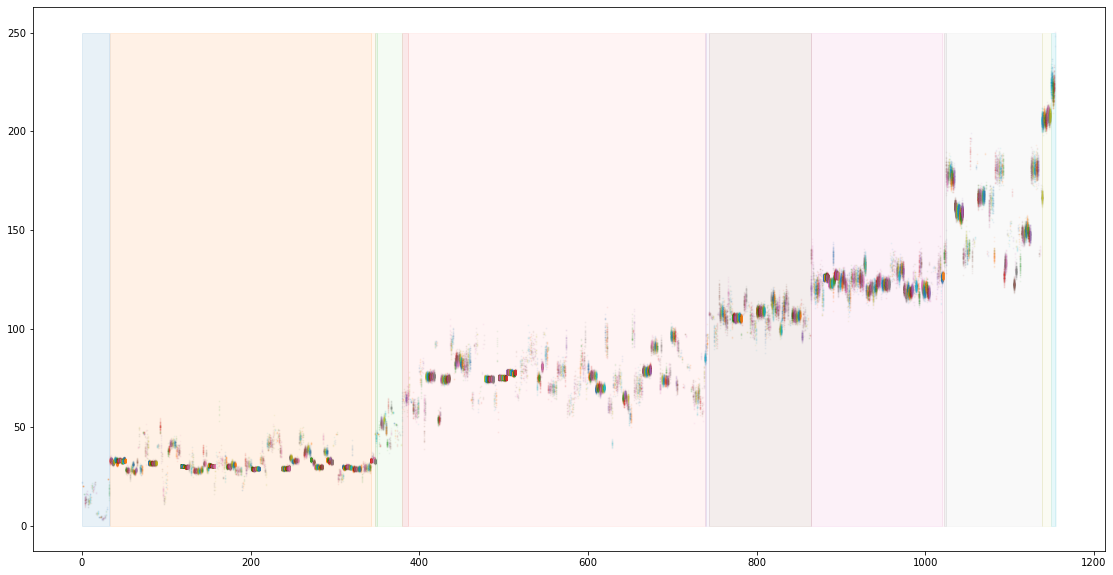

In [310]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    # if a_cov_dp.cluster_counts[c]> 5000:
    #     ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

In [353]:
self=a_cov_dp

In [351]:
clust_pick = 28
clust_pick_segs = np.r_[self.cluster_dict[clust_pick]].astype(int)

seg_means = np.array([np.array(self.segment_r_list[i]).mean() for i in clust_pick_segs])
sort_indices = np.argsort(seg_means)
sorted_vals = seg_means[sort_indices]

abs_dif = []
for i in np.r_[1:len(sorted_vals) - 1]:
    abs_dif.append(abs(sorted_vals[:i].mean() - sorted_vals[i:].mean()))
abs_dif = np.array(abs_dif)
A_list = clust_pick_segs[sort_indices[:np.argmax(abs_dif) + 1]]
B_list = clust_pick_segs[sort_indices[np.argmax(abs_dif) + 1:]]

In [323]:
ML_rat = self._ML_cluster(A_list) + self._ML_cluster(B_list) - self._ML_cluster(clust_pick_segs)

#compute DP prior ratio of splitting cluster over leaving it as is
dp_prior_rat = self.DP_split_prior(A_list, B_list)

# add ML ratios to get the likelihood of splitting
ML_tot = ML_rat + dp_prior_rat

In [341]:
kernel_difs = []
for i in np.r_[10:len(sorted_vals) - 10]:
    kernel_difs.append(abs(sorted_vals[i-10:i].mean() - sorted_vals[i:i+10].mean()))

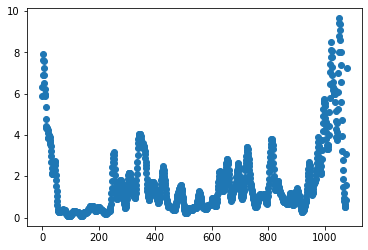

In [342]:
plt.scatter(np.r_[:len(kernel_difs)], kernel_difs)

In [352]:
%%time
tot_list = []
stay_ml = self._ML_cluster(clust_pick_segs)
for i in np.r_[1:len(sorted_vals) - 1]:
    A_list = clust_pick_segs[sort_indices[:i + 1]]
    B_list = clust_pick_segs[sort_indices[i + 1:]]
    ML_rat = self._ML_cluster(A_list) + self._ML_cluster(B_list) - stay_ml
    dp_prior_rat = self.DP_split_prior(A_list, B_list)
    ML_tot = ML_rat + dp_prior_rat
    tot_list.append(ML_tot)

CPU times: user 271 ms, sys: 0 ns, total: 271 ms
Wall time: 270 ms


In [318]:
seg_means

array([33.16273173, 33.67792991, 32.68404039, ..., 30.08299531,
       29.8468554 , 29.7746476 ])

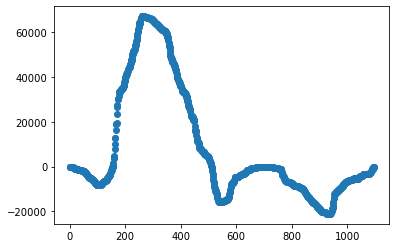

In [332]:
plt.scatter(np.r_[:len(tot_list)], tot_list)

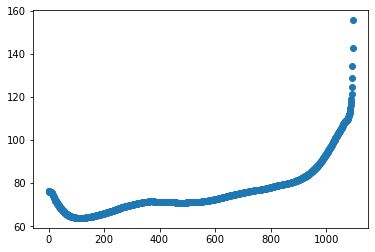

In [320]:
plt.scatter(np.r_[:len(abs_dif)], abs_dif)

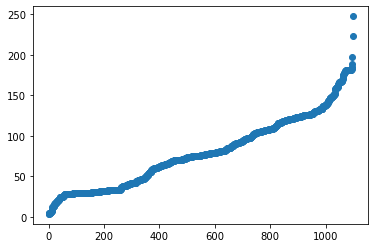

In [321]:
plt.scatter(np.r_[:len(sorted_vals)], sorted_vals)

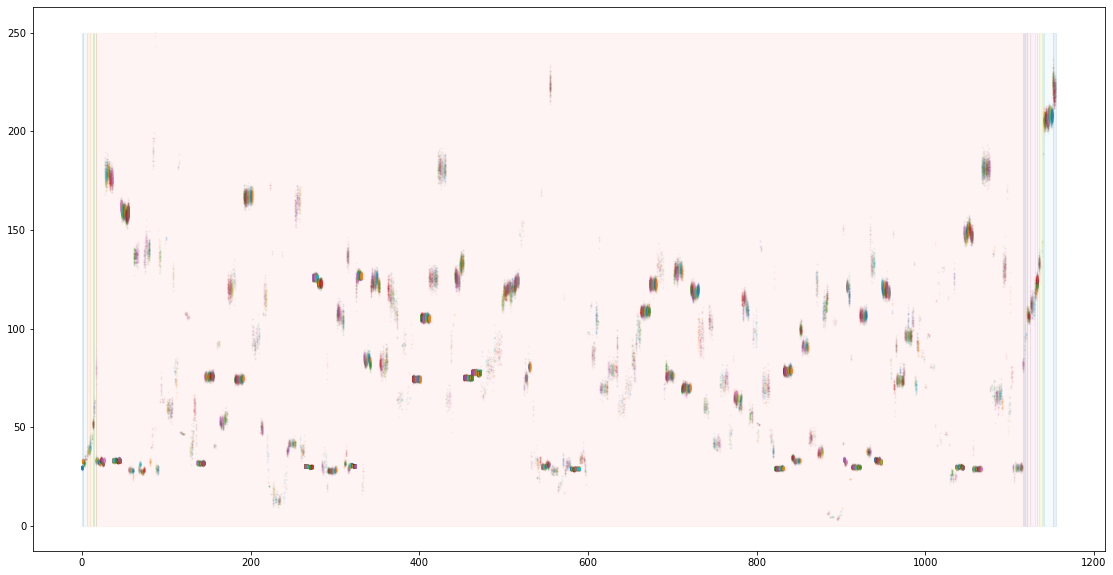

In [322]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    # if a_cov_dp.cluster_counts[c]> 5000:
    #     ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

In [411]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [412]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [413]:
a_cov_dp.run(10)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 1286
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 771
n unassigned: 0
splitting cluster 19
splitting cluster 354
splitting cluster 34
splitting cluster 1286
splitting cluster 846
n unassigned: 0
splitting cluster 1625
splitting cluster 1642
splitting cluster 1645
n unassigned: 0
splitting cluster 1624
n unassigned: 0
splitting cluster 1686
splitting cluster 1686
splitting cluster 1658
splitting cluster 1749
n unassigned: 0
splitting cluster 1618
splitting cluster 1747
splitting cluster 1790
splitting cluster 636
splitting cluster 1773
splitting cluster 1806
splitting cluster 1808
n unassigned: 0
splitting cluster 1806
splitting cluster 1824
n unassigned: 0
splitting cluster 366
splitting cluster 1828
n unassigned: 0
splitting cluster 19
splitting cluster 568


([array([2127,   28, 2127, ...,   -1,   -1,   -1]),
  array([28, 28, 28, ..., -1, -1, -1]),
  array([28, 28, 28, ..., -1, -1, -1]),
  array([28, 28, 28, ..., -1, -1, -1]),
  array([3485, 3485, 3485, ...,   -1,   -1,   -1]),
  array([3478, 3485, 3485, ...,   -1,   -1,   -1]),
  array([3478, 4089, 4089, ...,   -1,   -1,   -1]),
  array([3478, 4425, 4425, ...,   -1,   -1,   -1]),
  array([3478, 4826, 4826, ...,   -1,   -1,   -1]),
  array([5089, 5089, 5089, ...,   -1,   -1,   -1])],
 SortedDict({19: 3535, 79: 6, 366: 35205, 1594: 865, 2809: 11706, 4663: 10165, 4666: 35258, 4756: 6921, 5004: 2205, 5005: 4180, 5028: 67, 5089: 41369, 5114: 3240, 5125: 136, 5139: 400, 5165: 25, 5171: 30}))

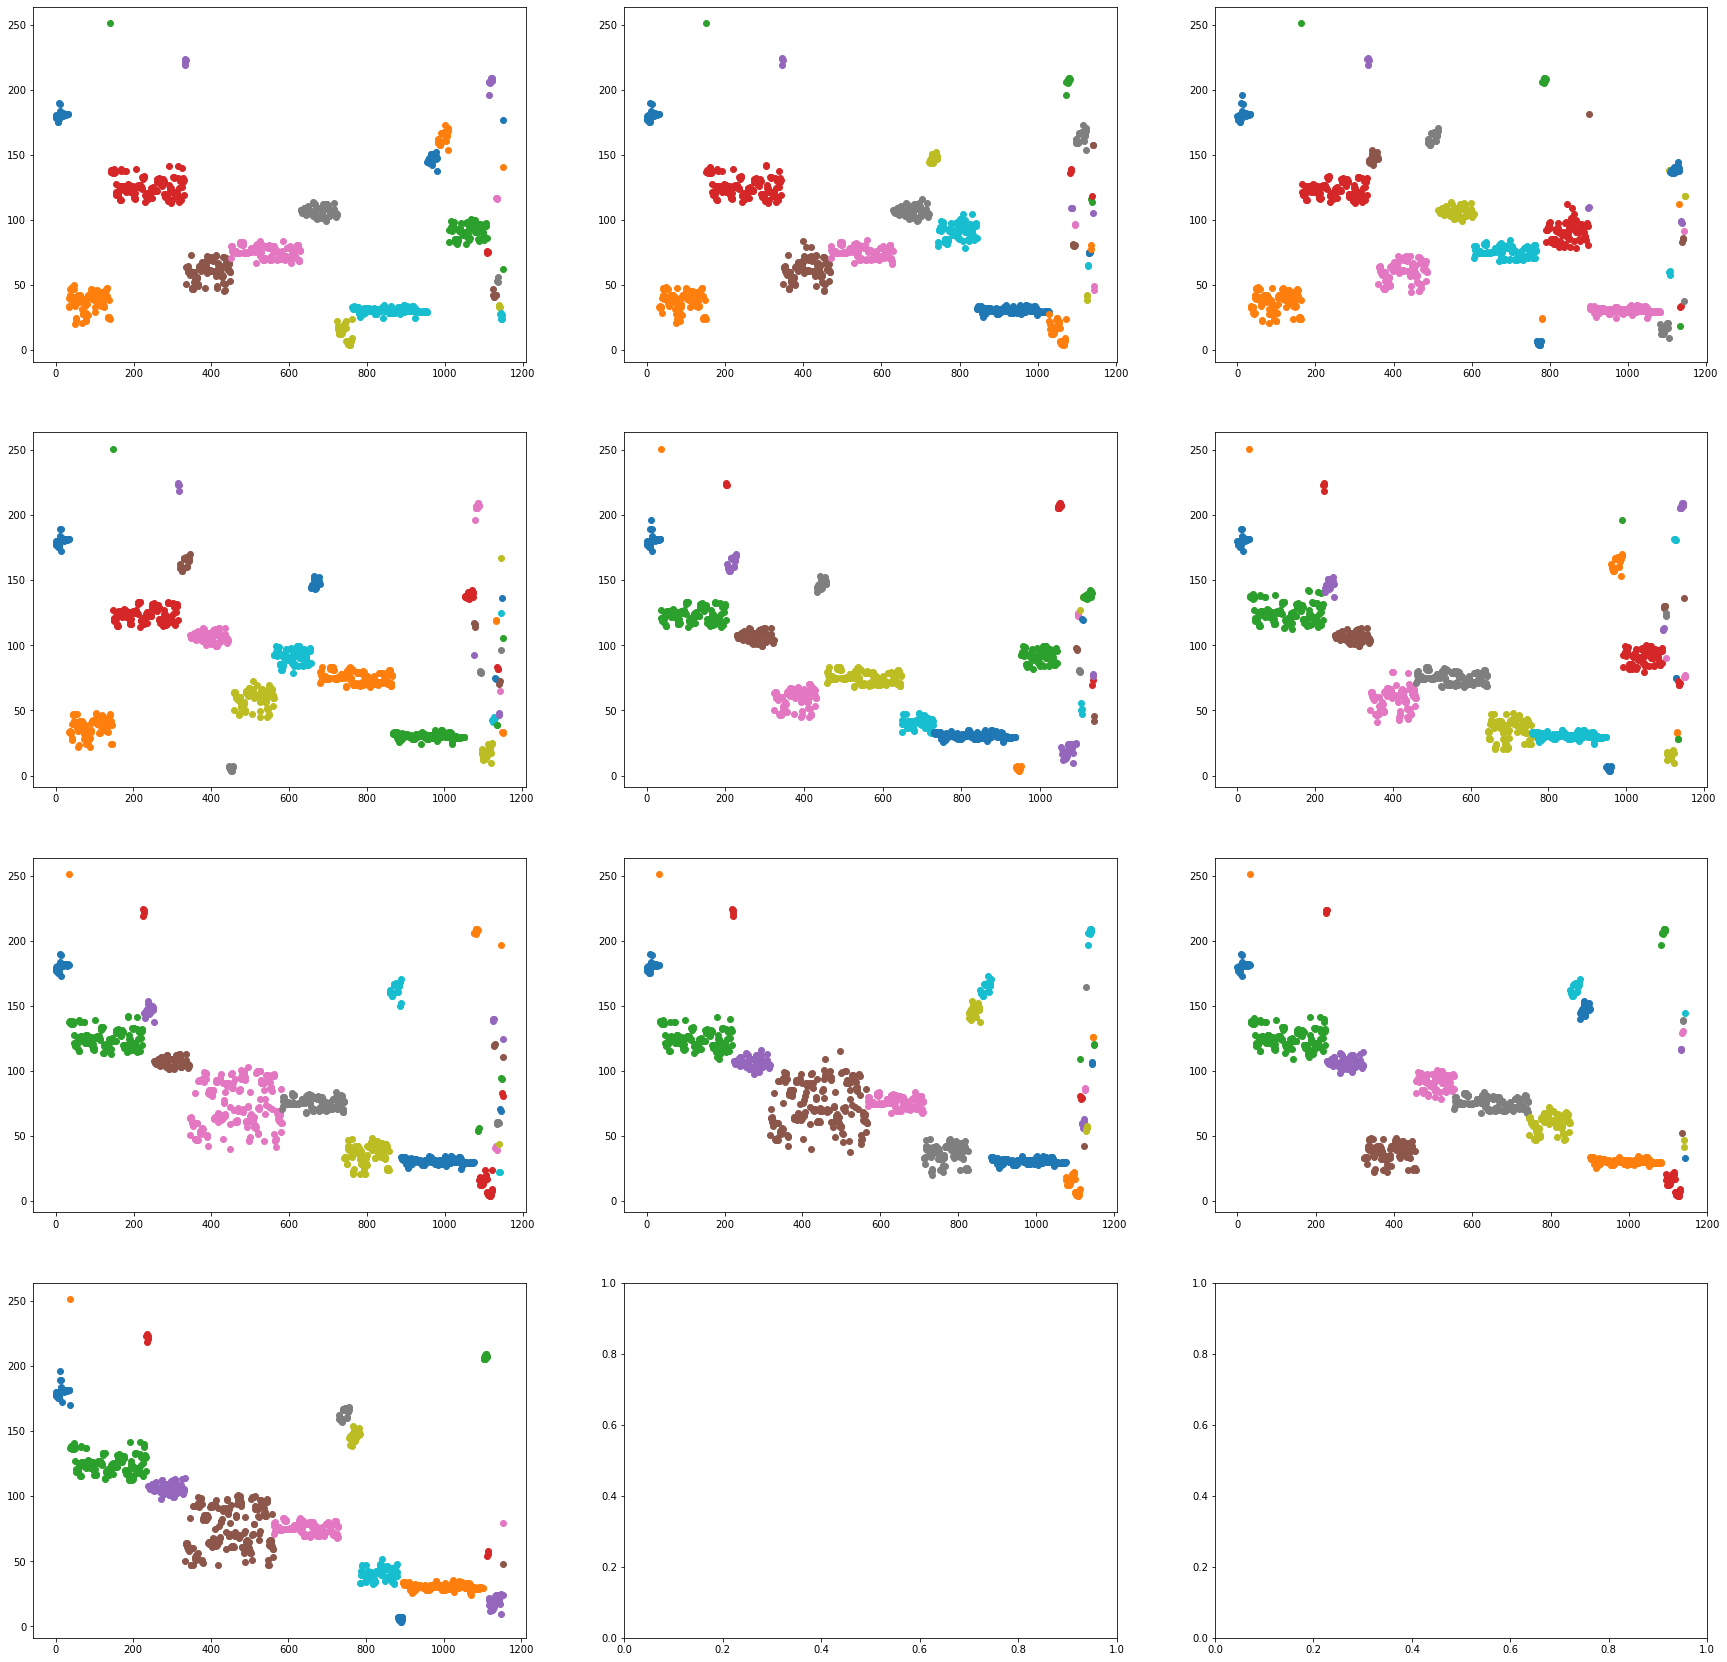

In [418]:
f_clust, axs = plt.subplots(4,3, figsize = (30,30))
ax_lst = axs.flatten()
for j in range(10):
    counter=0
    draw_dict = a_cov_dp.clusters_to_segs[j]
    for c in draw_dict:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in draw_dict[c]]
        ax_lst[j].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)

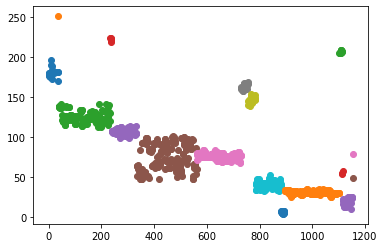

In [423]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

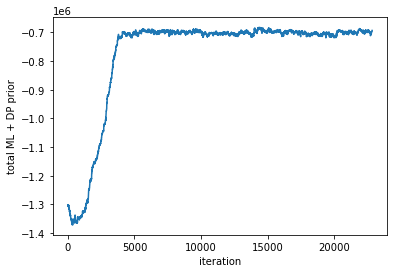

In [424]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

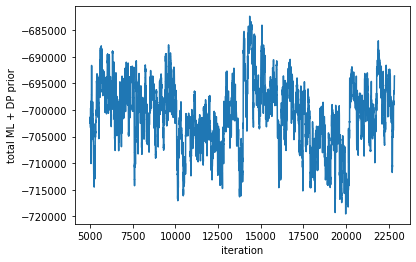

In [422]:
plt.plot(np.r_[5000:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

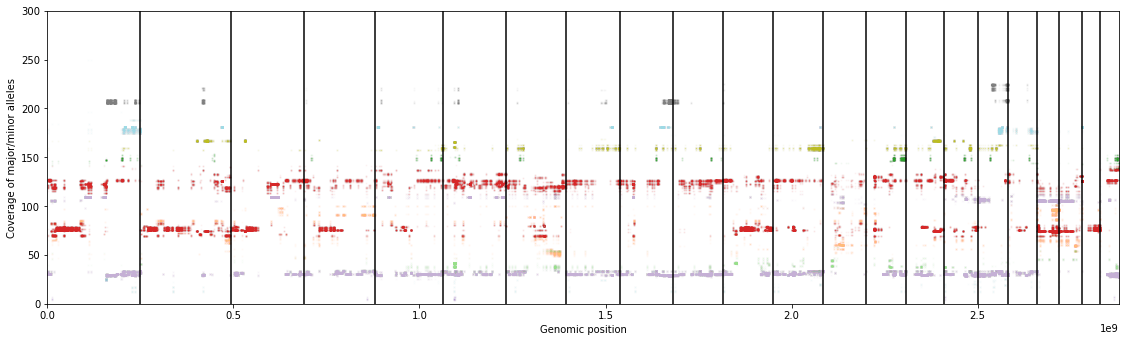

In [425]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [426]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

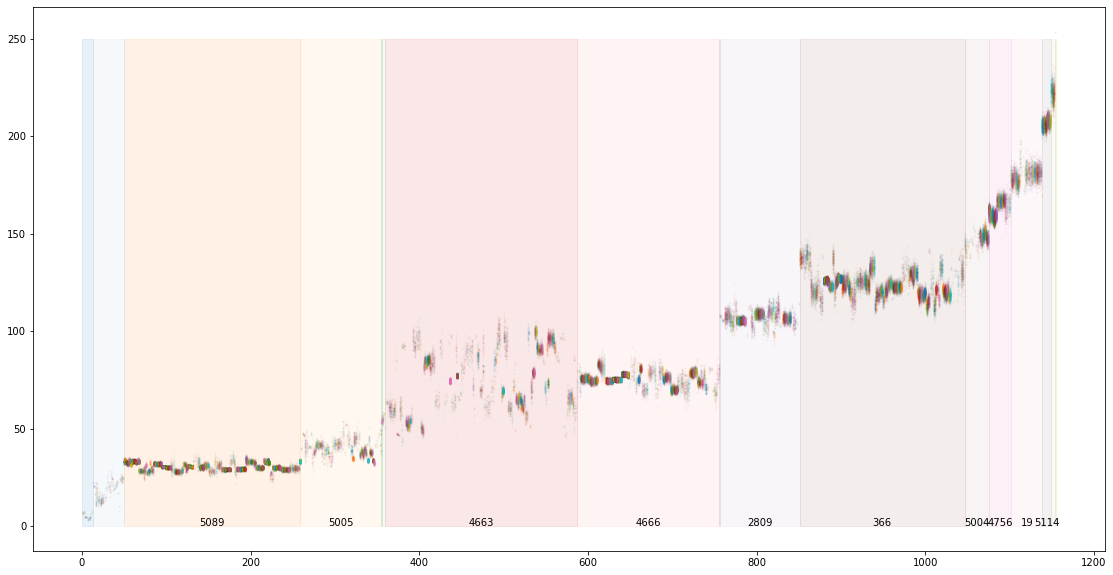

In [427]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

alpha=50 multidraw

In [439]:
import importlib
importlib.reload(dp_a_cov)

<module 'hapaseg.a_cov_DP' from '/home/opriebe/dev/HapASeg/hapaseg/a_cov_DP.py'>

In [440]:
a_cov_dp = dp_a_cov.Run_Cov_DP(multidraw_df.copy(), beta, coverage_prior=True, seed_all_clusters=True)

In [441]:
a_cov_dp.run(10)

n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
splitting cluster 648
n unassigned: 0
n unassigned: 0
splitting cluster 1502
n unassigned: 0
n unassigned: 0
splitting cluster 354
n unassigned: 0
splitting cluster 20
splitting cluster 24
n unassigned: 0
splitting cluster 1593
splitting cluster 365
splitting cluster 641
splitting cluster 844
n unassigned: 0
splitting cluster 1502
splitting cluster 1502
n unassigned: 0
splitting cluster 365
splitting cluster 1502
n unassigned: 0
n unassigned: 0
splitting cluster 1240
splitting cluster 1502
splitting cluster 33
splitting cluster 1637
splitting cluster 1394
splitting cluster 1394
splitting cluster 1797
n unassigned: 0
splitting cluster 1502
n unassigned: 0
splitting cluster 1818
splitting cluster 1502
splitting cluster 290
n unassigned: 0
splitting cluster 365
splitting cluster 1879
splitting cluster 1502
n unassigned: 0
splitting

([array([1613, 1613, 1613, ...,   -1,   -1,   -1]),
  array([2826, 2826, 2826, ...,   -1,   -1,   -1]),
  array([2826, 2826, 2818, ...,   -1,   -1,   -1]),
  array([3450, 3295, 3295, ...,   -1,   -1,   -1]),
  array([3219, 3295, 3295, ...,   -1,   -1,   -1]),
  array([3996, 3996, 3996, ...,   -1,   -1,   -1]),
  array([4125, 4391, 4391, ...,   -1,   -1,   -1]),
  array([4428, 4428, 4503, ...,   -1,   -1,   -1]),
  array([5011, 5011, 5011, ...,   -1,   -1,   -1]),
  array([5168, 5168, 5168, ...,   -1,   -1,   -1])],
 SortedDict({79: 6, 365: 33464, 770: 1017, 1502: 3369, 3951: 6585, 4806: 6587, 4810: 4597, 5106: 12166, 5163: 3201, 5168: 41249, 5255: 3240, 5283: 1972, 5291: 173, 5306: 390, 5323: 2433, 5324: 82, 5325: 103, 5327: 965, 5328: 31539, 5329: 82, 5335: 135, 5337: 817, 5338: 75, 5339: 111, 5340: 508, 5341: 111, 5344: 35, 5345: 26, 5346: 135, 5347: 166, 5348: 69, 5349: 135}))

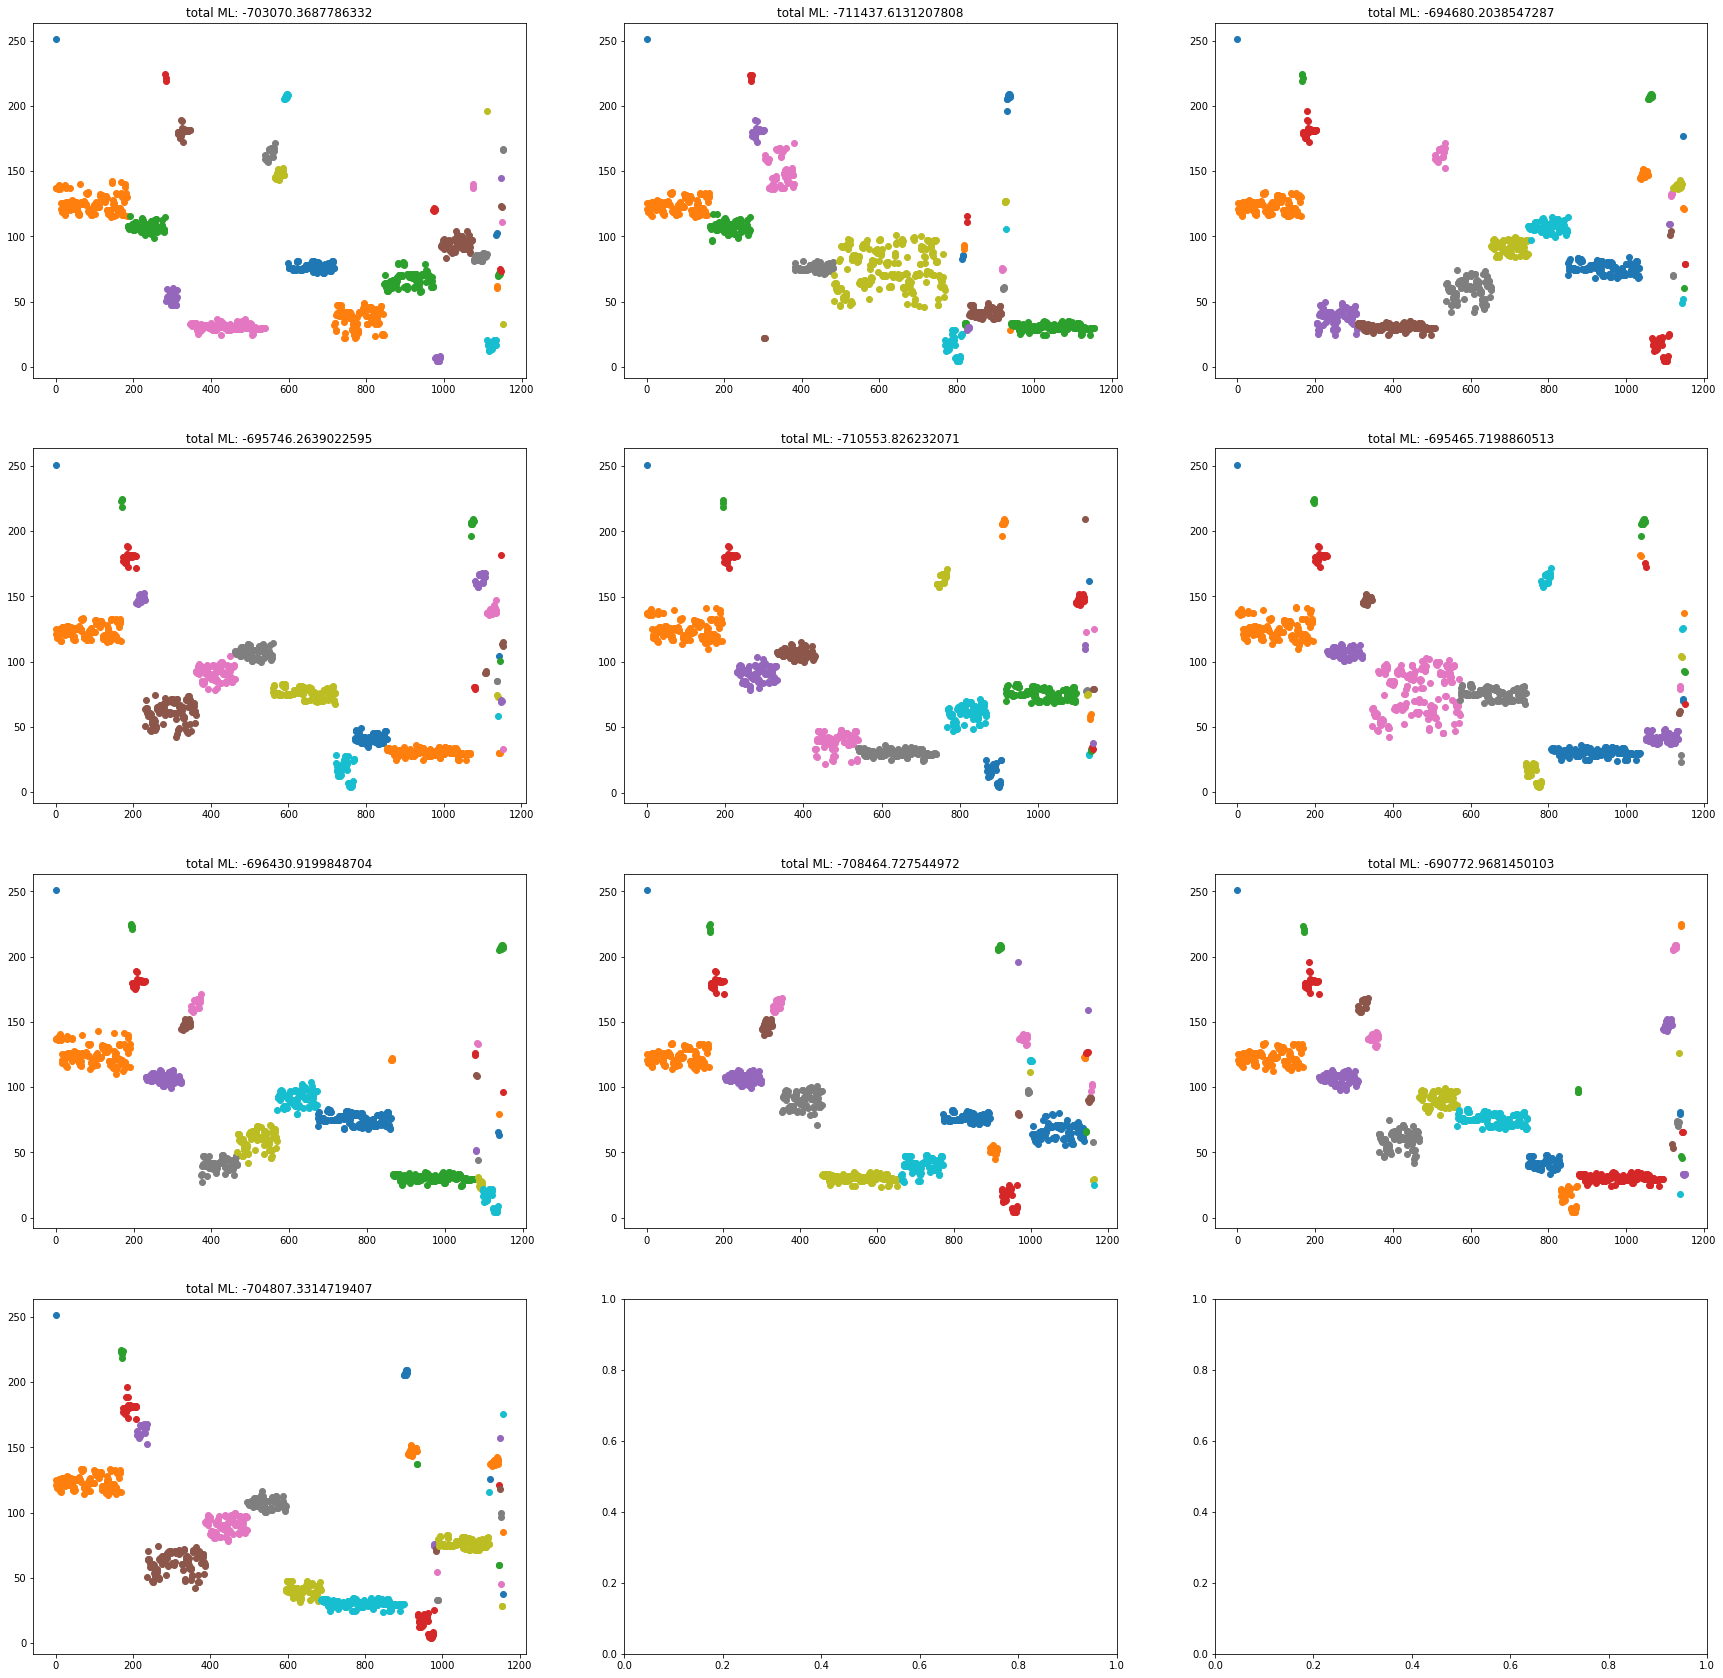

In [446]:
f_clust, axs = plt.subplots(4,3, figsize = (30,30))
mls = (np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))[a_cov_dp.draw_indices]
ax_lst = axs.flatten()
for j in range(10):
    counter=0
    draw_dict = a_cov_dp.clusters_to_segs[j]
    for c in draw_dict:
        vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in draw_dict[c]]
        ax_lst[j].scatter(np.r_[counter:counter+len(vals)], vals)
        counter+= len(vals)
    ax_lst[j].set_title('total ML: {}'.format(mls[j]))

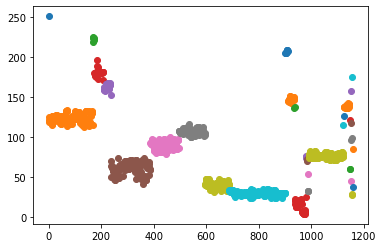

In [447]:
counter=0
for c in a_cov_dp.cluster_dict:
    vals = [np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]
    plt.scatter(np.r_[counter:counter+len(vals)], vals)
    counter+= len(vals)

Text(0.5, 0, 'iteration')

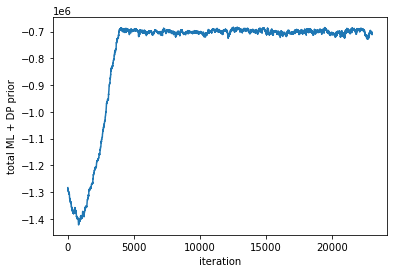

In [448]:
plt.plot(np.r_[:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history) + np.array(a_cov_dp.DP_total_history))
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

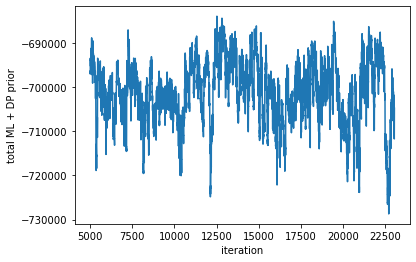

In [449]:
plt.plot(np.r_[5000:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [452]:
np.exp(20)

485165195.4097903

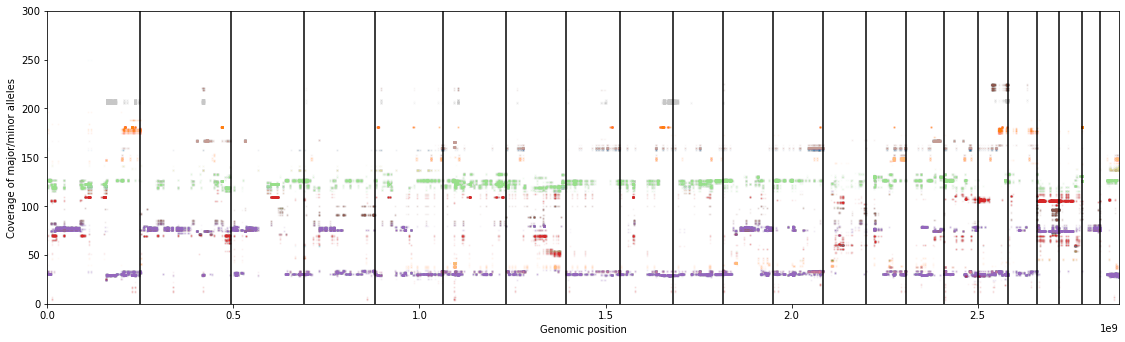

In [450]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
full_df = list(a_cov_dp.cov_df.groupby(['allelic_cluster', 'cov_DP_cluster', 'allele', 'dp_draw']))
for c in a_cov_dp.cluster_dict.keys():
    for s in a_cov_dp.cluster_dict[c]:
        x = full_df[s][1].loc[:,["start_g", "end_g", 'allelic_cluster', 'cov_DP_mu', 'allele', 'maj_count', 'min_count']]
        adp = x['allelic_cluster'].values[0]
        if len(x) > 10:
            major, minor = x['maj_count'].sum(), x['min_count'].sum()
        else:
            major, minor = ADP_dict[adp]
        
        locs, f = _scatter_apply(x, minor,major)
        y = np.exp(x.cov_DP_mu)
        plt.scatter(
            locs,
            f*y,
            color = np.array(colors)[c % len(colors)],
            marker = '.',
            alpha = 0.03,
            s=4
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);

In [436]:
rs = []
for c in a_cov_dp.cluster_dict:
    rs.append((np.array([np.array(a_cov_dp.segment_r_list[i]).mean() for i in a_cov_dp.cluster_dict[c]]).mean(),c))

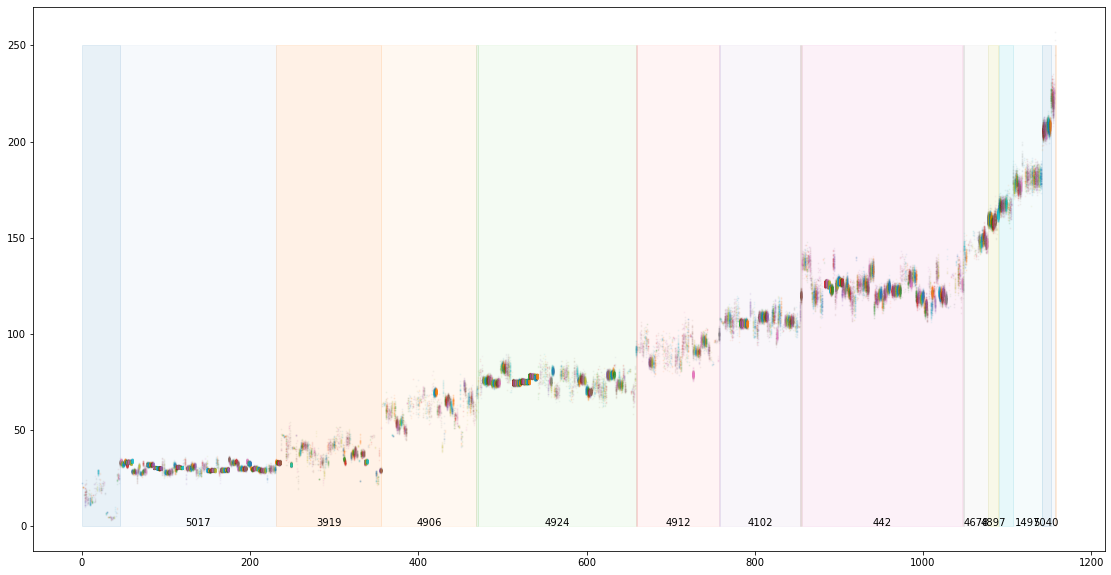

In [437]:
f, ax = plt.subplots(1, figsize = [19.2, 10])
counter=0
cc = 0
for c in [t[1] for t in sorted(rs)]:
    c0 = counter
    vals = [np.array(a_cov_dp.segment_r_list[i]) for i in a_cov_dp.cluster_dict[c]]
    
    for arr in vals:
        ax.scatter(np.repeat(counter, len(arr)), arr, marker = '.', alpha=0.05, s=4)
        counter+= 1
    ax.add_patch(mpl.patches.Rectangle((c0,0), counter-c0, 250, fill=True, alpha=0.10, color = colors[cc % len(colors)]))
    if a_cov_dp.cluster_counts[c]> 2000:
        ax.text(c0 + (counter-c0)/2, 0, '{}'.format(c), horizontalalignment='center')
    cc+=1

Text(0.5, 0, 'iteration')

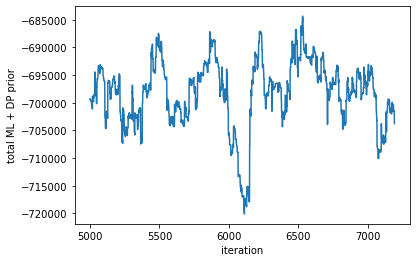

In [457]:
plt.plot(np.r_[5000:len(a_cov_dp.DP_total_history)], np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

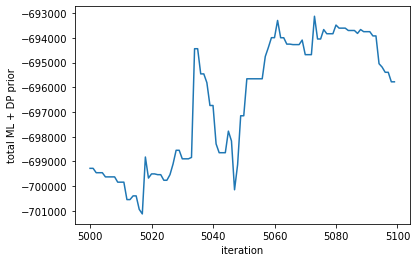

In [461]:
plt.plot(np.r_[5000:5100], (np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])[:100])
plt.ylabel('total ML + DP prior')
plt.xlabel('iteration')

In [460]:
np.diff(np.array(a_cov_dp.ML_total_history)[5000:] + np.array(a_cov_dp.DP_total_history)[5000:])[:100]

array([    0.        ,  -177.2512183 ,     0.        ,     0.        ,
        -168.77742523,     0.        ,     0.        ,     0.        ,
        -213.61204444,     0.        ,     0.        ,  -705.50250581,
           0.        ,   150.08964151,     0.        ,  -545.8508569 ,
        -183.75542477,  2303.07158921,  -852.3467647 ,   168.77742523,
           0.        ,   -30.91188307,     0.        ,  -226.78404219,
           0.        ,   226.78404219,   431.65961743,   555.12529323,
           0.        ,  -345.66560278,     0.        ,     0.        ,
          56.17413427,  4399.97440276,     0.        , -1018.98310322,
           0.        ,  -354.90347927,  -924.24657894,     0.        ,
       -1554.09162393,  -356.93301343,     0.        ,     0.        ,
         873.67294978,  -397.23832771, -1976.11151482,  1018.98310322,
        1976.11151482,     0.        ,  1496.40103879,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      